# Research Methods for Business Analytics
## Loan Default Dataset
Dataset: Loan Defualt Risk - https://www.kaggle.com/datasets/yasserh/loan-default-dataset/data

### Student:<br>
Marco Piccolo - 63996

### Table of content

- [0 Executive Summary](#0-executive-summary)
- [1 Introduction](#1-introduction)
    - [1.1 Preparing the dataset](#11-preparing-the-dataset)
    - [1.2 Dropping columns and rows](#12-dropping-columns-and-rows)
    - [1.3 Duplicate rows](#13-duplicate-rows)
- [2 Exploratory analysis](#2-exploratory-analysis)
    - [2.1 Non-Continuous variables](#21-non-continuous-variables)
    - [2.2 Continuous variables](#22-continuous-variables)
    - [2.3 Frequencies](#23-frequencies)
    - [2.4 Measures of central tendency](#24-measures-of-central-tendency)
    - [2.5 Distribution](#25-distribution)
    - [2.6 Correlation](#26-correlation)
    - [2.7 Data Curation and Preparation for Inferential Analysis](#27-data-curation-and-preparation-for-inferential-analysis)
        - [2.7.1 Missing values](#271-missing-values)
        - [2.7.2 Data cleaning - Rate of interest](#272-data-cleaning---rate-of-interest)
        - [2.7.3 Data cleaning - Loan to value (LTV)](#273-data-cleaning---loan-to-value-ltv)
    - [2.8 Summary statistic table](#28-summary-statistic-table)
    - [2.9 T-Tests for Group Comparisons](#29-t-tests-for-group-comparisons)
        - [2.9.1 T-Test - Rate of interest](#291-t-test---rate-of-interest)
            - [2.9.1 Mean and Variance](#291-mean-and-variance)
            - [2.9.1 Confidence intervals](#291-confidence-intervals)
            - [2.9.1 Levene's test](#291-levenes-test)
            - [2.9.1 Welch's T-Test statistic](#291-welchs-t-test-statistic)
            - [2.9.1 Welch's T-Test Conclusion](#291-welchs-t-test-conclusion)
        - [2.9.2 T-Test - Loan to Value](#292-t-test---loan-to-value)
            - [2.9.2 Mean and Variance](#292-mean-and-variance)
            - [2.9.2 Confidence intervals](#292-confidence-intervals)
            - [2.9.2 Levene's test](#292-levenes-test)
            - [2.9.2 Welch's T-Test statistic](#292-welchs-t-test-statistic)
            - [2.9.2 Welch's T-Test Conclusion](#292-welchs-t-test-conclusion)
    - [2.10 Explanatory analysis overview](#210-Explanatory-analysis-overview)
- [3 Logistic regression](#3-logistic-regression)
    - [3.1 Creating the model](#31-Creating-the-model)
        - [3.1.1 Model 1: Impact of an Applicant being Female](#311-Model-1:-Impact-of-an-Applicant-being-Female)
        - [3.1.2 Model 2: Impact of an Applicant being Male](#312-Model-2:-Impact-of-an-Applicant-being-Male)
    - [3.2 Interpreting the outcome](#32-Interpreting-the-outcome)
        - [3.2.1 Goodness-of-Fit](#321-goodness-of-fit)
        - [3.2.2 Hypotheses testing](#322-hypotheses-testing)
        - [3.2.3 Odd ratio](#323-odd-ratio)
- [4 Conclusion](#4-conclusion)

# Executive Summary

Our chosen dataset, "Loan Default" aims to identify patterns and predict which applicants are at higher risk of defaulting.
Despite the topic's significance and its extensive exploration by Kaggle users, we, Group A2, decide to explore a different angle, aiming to investigate if gender plays a significant role in loan acceptance and loan terms.

**We seek to determine if female applicants face unequal credit conditions compared to their male counterparts,** potentially indicating gender-based disparities in loan approval and terms.
By exploring this angle, we hope to uncover evidence of gender inequality in the credit evaluation process, a subject of both economic and social relevance. [1]

We analysed the relationship between an applicant's gender and the likelihood of a loan approval along with the associated loan conditions. Thereby we were able to find out that **on average female applicants are slightly disadvantaged** in terms of loan conditions and approvals.

##### References

[1] Karki, N.; Russel, C. (2023): Breaking silos for gender equality.

URL: https://www.eib.org/en/stories/gender-equality-education-economic-political

# 1 Introduction

## Research question
Does the applicant's gender influence the approval rate (Status) of the loan and the conditions (rate of interest) under which the loan is granted?

This research question aims to show whether there is evidence of gender inequity in credit granting in the given data set. From our perspective, this is a very interesting topic in the context of ongoing societal discourse.

## Hypotheses

-  $\text{Null Hypothesis } (H_0)$: The applicant's gender **does not** influence the approval rate of the loan or the conditions under which the loan is granted.

- $\text{Alternative Hypothesis } (H_1)$: The applicant's gender **does** influence the approval rate of the loan and/or the conditions under which the loan is granted.

We will apply T-tests to determine the impact on different credit conditions. Then, we will perform a logistic regression to determine the influence on the approval rate.







#### Variable in focus

- **Gender**: This categorical variable measured on a nominal scale, represents the gender of the loan applicant. In this dataset, it includes the categories Male, Female, Sex Not Available, and Joint, indicating whether the application involves a male applicant, a female applicant, undisclosed gender, or a joint application for a shared bank account.

- **Loan-to-Value (LTV)**: This numerical variable measured on ratio scale, is the financial ratio that compares the amount of money being borrowed to the market price of the asset being purchased. ([source](https://www.investopedia.com/terms/l/loantovalue.asp))

- **Loan Amount**: This numerical variable measured on a ratio scale, indicates the total sum of money the applicant is requesting to borrow.

- **Rate of Interest**: This numerical variable measured on a ratio scale, is the interest rate is the amount a lender charges a borrower. A borrower that is considered low-risk by the lender will have a lower interest rate. A loan that is considered high-risk will have a higher interest rate.([source](https://https://www.investopedia.com/terms/i/interestrate.asp))

- **Status**: This variable is a categorical variable measured on a binary nominal scale that indicates the outcome of the loan application process. For researching purposes we assumed: 1 represents that the loan was granted, while 0 indicates that the loan was denied.

## 1.1 Preparing the dataset

In this section, we begin by loading the dataset and exploring each variable. We aim to determine how to handle irrelevant variables, and address any missing values.

In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import levene
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Read the Loan Default dataset

df = pd.read_csv('/Users/marco/Library/CloudStorage/OneDrive-NovaSBE/T1/Reasearch Methods/Group Project/Final/Loan_Default.csv')
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


We want to check the dimensions of our dataset, so we are using the df.shape function for that purpose.

In [3]:
# Check how many rows and columns are in the dataset
df.shape

(148670, 34)

In our dataset there are:
- Rows: 148,670
- Columns: 34

In the next block, we are using the df.columns function to list all the column names in the dataset.

In [4]:
# Check the columns of our dataset
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In the next two sections, we aim to check the data types of each variable to understand the types of information we are dealing with.

In [5]:
# Check the type of the variables
df.dtypes

ID                             int64
year                           int64
loan_limit                    object
Gender                        object
approv_in_adv                 object
loan_type                     object
loan_purpose                  object
Credit_Worthiness             object
open_credit                   object
business_or_commercial        object
loan_amount                    int64
rate_of_interest             float64
Interest_rate_spread         float64
Upfront_charges              float64
term                         float64
Neg_ammortization             object
interest_only                 object
lump_sum_payment              object
property_value               float64
construction_type             object
occupancy_type                object
Secured_by                    object
total_units                   object
income                       float64
credit_type                   object
Credit_Score                   int64
co-applicant_credit_type      object
a

In our dataset there are in total 34 variables:
- Type object variables: 21
- Type float variables: 8
- Type integer variables: 5

## 1.2 Dropping columns and rows

At this point, after having looked at what are the variables of our dataset, we decided to drop all variables that are not relevant in regard to our reasearch question.

- 'year', 'loan_limit', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'construction_type', 'credit_type', 'co-applicant_credit_type', 'submission_of_application', 'dtir1' - as they are not relevant for our analysis.
- Credit Score: We decided to drop the variable "Credit Score" because it may already be influenced and biased by the gender of the borrower. However, this could be a limitation as it could lead to omitted variable bias in the regression if Credit_Score is a strong predictor.
- Gender: To analyze gender inequality effectively, we will exclude the entries labeled "Sex Not Available" from the Gender variable.

In [6]:
df.drop(columns = ['year', 'loan_limit', 'loan_type', 'loan_purpose', 'Credit_Worthiness', 'construction_type', 'credit_type', 'Credit_Score','co-applicant_credit_type', 'submission_of_application', 'dtir1'], axis=1 , inplace=True)
df.head()

,ID,Gender,approv_in_adv,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,...,property_value,occupancy_type,Secured_by,total_units,income,age,LTV,Region,Security_Type,Status
0,24890,Sex Not Available,nopre,nopc,nob/c,116500,NaN,NaN,NaN,360.0,...,118000.0,pr,home,1U,1740.0,25-34,98.728814,south,direct,1
1,24891,Male,nopre,nopc,b/c,206500,NaN,NaN,NaN,360.0,...,NaN,pr,home,1U,4980.0,55-64,NaN,North,direct,1
2,24892,Male,pre,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,...,508000.0,pr,home,1U,9480.0,35-44,80.019685,south,direct,0
3,24893,Male,nopre,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,...,658000.0,pr,home,1U,11880.0,45-54,69.376900,North,direct,0
4,24894,Joint,pre,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,...,758000.0,pr,home,1U,10440.0,25-34,91.886544,North,direct,0


Since in our hypotesis we are focusing on the genders male and female, we are now dropping the value "Sex Not Available"  and "Joint" in the variable "Gender" as they are not relevant for our analysis.

In [7]:
print('Gender variable before:',df['Gender'].unique())
df = df[df['Gender'] != 'Sex Not Available']
df = df[df['Gender'] != 'Joint']
print ('Gendere variable after:',df['Gender'].unique())

Gender variable before: ['Sex Not Available' 'Male' 'Joint' 'Female']
Gendere variable after: ['Male' 'Female']


In [8]:
df.shape

(69612, 23)

After having dropped variables and values we assest again the size of our dataset.
Our dataset has now 69,612 rows and 23 colums.

## 1.3 Duplicate rows
Looking for duplicate rows

In [9]:
# Look for duplicates
duplicate = df.duplicated().sum()
print(f'There are {duplicate} in our dataset.')

There are 0 in our dataset.


There are no duplicated rows in our dataseta, this means that every row and so ID is unique.

# 2 Exploratory Data Analysis

**Explanation of some of the remaining Variables**

Understanding some abbreviations and their meaning:

- Approveal in advance (approv_in_adv): as the name suggests.
- Open credit: whether the borrower is allowed to borrow more money.
- Neg ammortization: A negative amortization loan is one in which unpaid interest is added to the balance of unpaid principal. ([source](https://www.investopedia.com/terms/n/negativeamortization.asp))
- Occupancy type: PR, SR, and IR refer to primary, secondary and investment. Financial risks increase with the latter ones, so do interest rates. [source](https://www.homelendingpal.com/how-mortgage-lenders-determine-interest-rates-based-on-occupancy-types/)
- Security type: Direct or Indirect. Direct security means the borrower uses the mortgaged house to pledge against the loan. [source](https://corporatefinanceinstitute.com/resources/commercial-lending/direct-security/#:~:text=To%20conclude%2C%20direct%20securities%20are,the%20borrower%20default%20on%20it.)

## 2.1 Non-Continuous variables

In this section of the analysis, we are exploring the categorical (non-continuous) variables in the dataset.

In [10]:
# Print  the unique values for each categorical variable

for column in df.columns:
    if df[column].dtypes == object:
        print(f'{column} {"-"*(30-len(column))} {df[column].unique()}')
    else:
        pass

Gender ------------------------ ['Male' 'Female']
approv_in_adv ----------------- ['nopre' 'pre' nan]
open_credit ------------------- ['nopc' 'opc']
business_or_commercial -------- ['b/c' 'nob/c']
Neg_ammortization ------------- ['not_neg' 'neg_amm' nan]
interest_only ----------------- ['not_int' 'int_only']
lump_sum_payment -------------- ['lpsm' 'not_lpsm']
occupancy_type ---------------- ['pr' 'ir' 'sr']
Secured_by -------------------- ['home' 'land']
total_units ------------------- ['1U' '3U' '4U' '2U']
age --------------------------- ['55-64' '35-44' '45-54' '65-74' '>74' '25-34' '<25']
Region ------------------------ ['North' 'south' 'central' 'North-East']
Security_Type ----------------- ['direct' 'Indriect']


## 2.2 Continuous variables

In this section of the notebook we are looking at the minimum, maximum, and range for each continuous variable in the dataset.

In [11]:
# Print minimum, maximum and range values for each continuous variable

for column in df.columns:
    if column != 'ID' and (df[column].dtype == float or df[column].dtype == int):
        minimum = round((df[column].min()),3)
        maximum = round((df[column].max()),3)
        range = round((maximum-minimum),3)
        print(f'{column} {"-"*(22-len(column))} Min: {minimum} {"-"*(12-len(str(minimum)))} Max: {maximum} {"-"*(12-len(str(maximum)))} Range: {range}')
    else:
        pass

loan_amount ----------- Min: 16500 ------- Max: 3576500 ----- Range: 3560000
rate_of_interest ------ Min: 2.25 -------- Max: 8.0 --------- Range: 5.75
Interest_rate_spread -- Min: -1.084 ------ Max: 3.357 ------- Range: 4.441
Upfront_charges ------- Min: 0.0 --------- Max: 60000.0 ----- Range: 60000.0
term ------------------ Min: 96.0 -------- Max: 360.0 ------- Range: 264.0
property_value -------- Min: 8000.0 ------ Max: 8508000.0 --- Range: 8500000.0
income ---------------- Min: 0.0 --------- Max: 335880.0 ---- Range: 335880.0
LTV ------------------- Min: 3.084 ------- Max: 2331.25 ----- Range: 2328.166
Status ---------------- Min: 0 ----------- Max: 1 ----------- Range: 1


**Rate of Interest** spans from 2.25% to 8.00%, with a range of 5.75%.

**LTV** ranges from 3.084 to 2331.25, with a range of 2328.166. Extremely wide range, suggesting the presence of significant outliers.


**Status** is a binary variable which contains only 1 and 0 values.

## 2.3 Frequencies

#### Absolute Frequency

In this section of the notebook, we are calculating the absolute and relative frequencies for the variables Gender and Status.

In [12]:
# absolute frequency for the Gender and Status variables.
def absolute_frequency (column):
    absolute_freq = df[column].value_counts()
    absolute_freq = absolute_freq.round(2)

    return absolute_freq

print(absolute_frequency('Gender'),'\n')
print(absolute_frequency('Status'),'\n')

Gender
Male      42346
Female    27266
Name: count, dtype: int64 

Status
0    51673
1    17939
Name: count, dtype: int64 



#### Relative Frequency

In [13]:
# relative frequency for the 'gender' variable.
def relative_frequency (column):
    relative_freq = df[column].value_counts(normalize=True)*100
    realtive_freq = relative_freq.round(2)

    return realtive_freq

print(relative_frequency('Gender'),'\n')
print(relative_frequency('Status'),'\n')

Gender
Male      60.83
Female    39.17
Name: proportion, dtype: float64 

Status
0    74.23
1    25.77
Name: proportion, dtype: float64 



#### Plotting the frequencies

In the following section, we are analyzing the Gender variable by plotting both its absolute and relative frequencies.

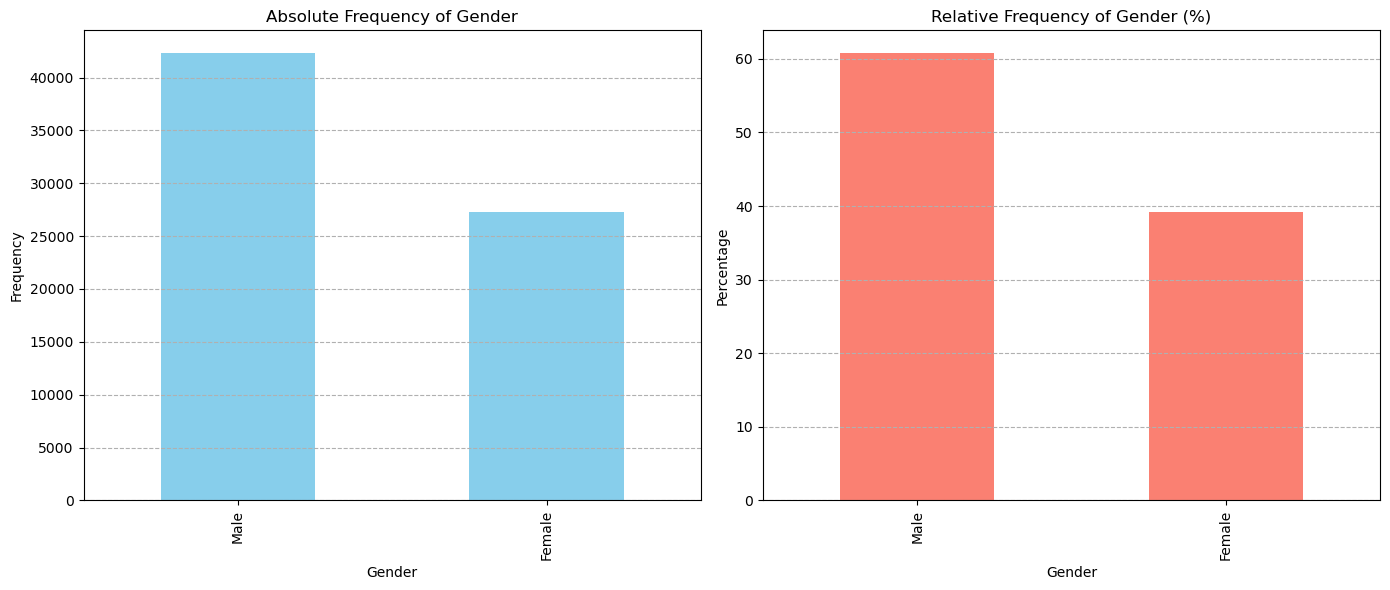

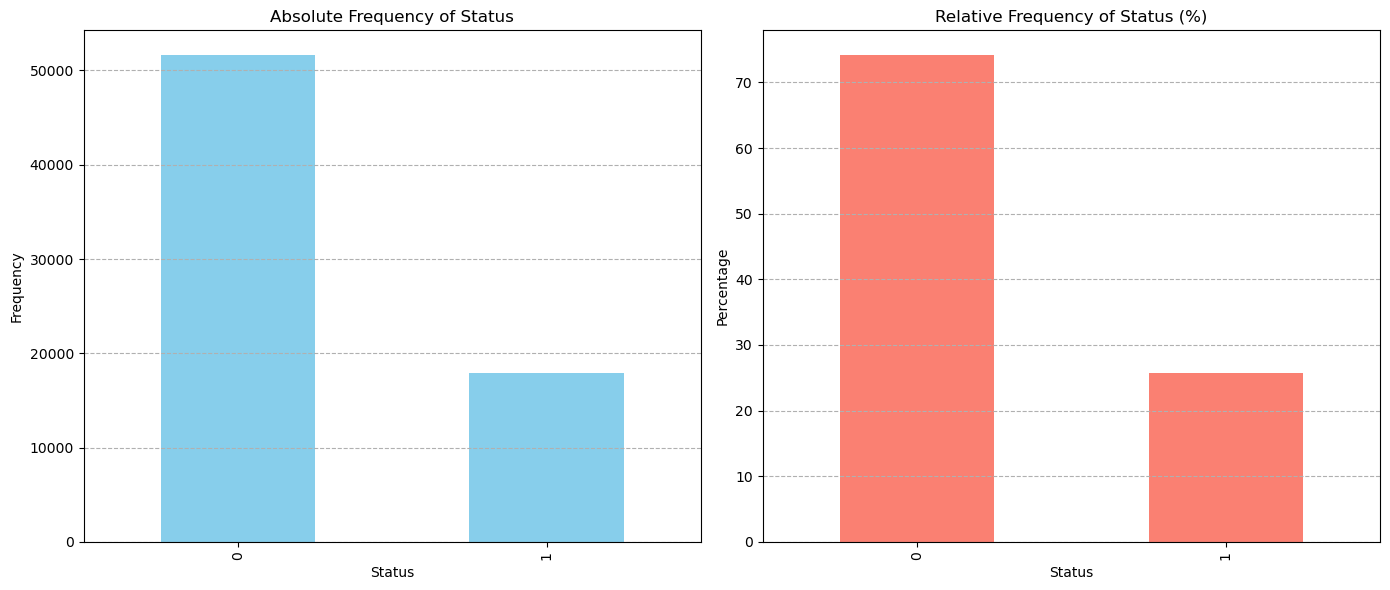

In [14]:
# Function to plot absolute and relative frequency for a given variable
def plot_frequency(variable, title):
    # Calculate absolute frequency
    abs_freq = absolute_frequency(variable)

    # Calculate relative frequency
    rel_freq = relative_frequency(variable)
    # Plotting
    plt.figure(figsize=(14, 6))

    # Absolute frequency
    plt.subplot(1, 2, 1)
    abs_freq.plot(kind='bar', color='skyblue')
    plt.title(f'Absolute Frequency of {title}')
    plt.xlabel(title)
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--')

    # Relative frequency
    plt.subplot(1, 2, 2)
    rel_freq.plot(kind='bar', color='salmon')
    plt.title(f'Relative Frequency of {title} (%)')
    plt.xlabel(title)
    plt.ylabel('Percentage')
    plt.grid(axis='y', linestyle='--')

    plt.tight_layout()
    plt.show()


plot_frequency('Gender', 'Gender')
plot_frequency('Status','Status')


We can observe that the majority of the applicants in the dataset are male, comprising over 61% of the total applicants. The remaining applicants are female, making up approximately 39%.
For the Status variable, 74% of the values are Status = 0, which we assume represents loans that were not approved, while 26% are Status = 1, indicating loans that were approved.

## 2.4 Measures of central tendency
### Mean, Media, Variance, Standard Deviation, Quantiles, and Mode

In this section, we are calculating various measures of central tendency and dispersion for key variables in our dataset. Specifically, we are computing the mean, median, variance, standard deviation, minimum, and maximum values for each selected variable. These metrics provide insights into the general distribution and spread of values in our dataset.

In [15]:
# Make a table with measure of central tendency
columns = ['rate_of_interest','LTV','Status']
df_stat_met = df[columns].agg(['mean','median','var','std', 'min', 'max']).T
df_stat_met = df_stat_met.round(2)
df_stat_met = df_stat_met.style.format("{:,.2f}")

df_stat_met

# Consider to drop the variance as not very meaningful and difficult to read

,mean,median,var,std,min,max
rate_of_interest,4.07,3.99,0.31,0.55,2.25,8.00
LTV,73.16,75.56,436.91,20.90,3.08,"2,331.25"
Status,0.26,0.00,0.19,0.44,0.00,1.00


### Percentiles and Mode

In the next section, we are calculating the 25th, 50th (median), and 75th percentiles, as well as the mode for each of the key variables in our dataset. Percentiles help us understand the distribution of values by showing the points below which a certain percentage of observations fall.

In [16]:
# Creating a function to calculate percentiles and mode.
def percentile(variable):

# Drop NaN values if present or the code would return "nan"
    data = df[variable].dropna()

    # Calculate percentiles
    # 25th percentile
    percentile_25 = np.percentile(data, 25)
    # 50th percentile (median)
    percentile_50 = np.percentile(data, 50)
    # 75th percentile
    percentile_75 = np.percentile(data, 75)
    # Mode. [0] takes the first mode in case of multiple ones
    mode_variable = df[variable].mode()[0]

    print(variable.upper())
    print("25th Percentile:", round(percentile_25, 3))
    print("50th Percentile (Median):", round(percentile_50, 3))
    print("75th Percentile:", round(percentile_75, 3))
    print("Mode:", round(mode_variable, 3), '\n')

percentile ('rate_of_interest')
percentile ('LTV')

RATE_OF_INTEREST
25th Percentile: 3.625
50th Percentile (Median): 3.99
75th Percentile: 4.5
Mode: 3.99 

LTV
25th Percentile: 61.285
50th Percentile (Median): 75.558
75th Percentile: 87.06
Mode: 91.667 



#### Box Plot - Mean and Median

In the next section, we are visualising the distribution of two important variables, LTV (Loan-to-Value ratio) and loan_amount.

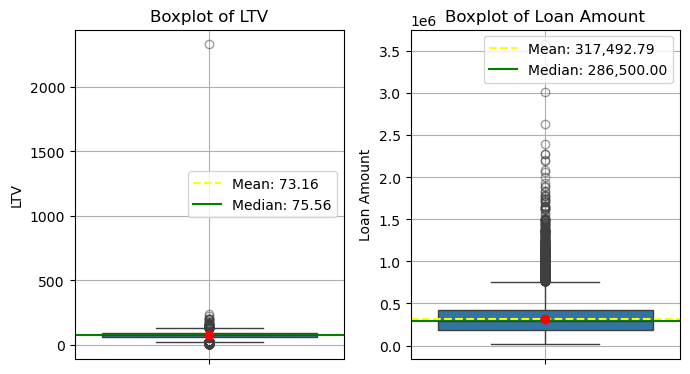

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(7, 4))

# Boxplot for 'LTV'
mean_ltv = df['LTV'].mean()
median_ltv = df['LTV'].median()
sns.boxplot(data=df, y='LTV', ax=axes[0], showmeans=True,
            meanprops={"marker": "o", "markeredgecolor": "red", "markerfacecolor": "red"},
            flierprops=dict(marker='o', color='orange', alpha=0.5))
axes[0].set_title('Boxplot of LTV')
axes[0].set_ylabel('LTV')
axes[0].grid(True)
axes[0].axhline(mean_ltv, color='yellow', linestyle='--', label=f'Mean: {mean_ltv:,.2f}')
axes[0].axhline(median_ltv, color='green', linestyle='-', label=f'Median: {median_ltv:,.2f}')
axes[0].legend()

# Boxplot for 'loan_amount'
mean_loan_amount = df['loan_amount'].mean()
median_loan_amount = df['loan_amount'].median()
sns.boxplot(data=df, y='loan_amount', ax=axes[1], showmeans=True,
            meanprops={"marker": "o", "markeredgecolor": "red", "markerfacecolor": "red"},
            flierprops=dict(marker='o', color='orange', alpha=0.5))
axes[1].set_title('Boxplot of Loan Amount')
axes[1].set_ylabel('Loan Amount')
axes[1].grid(True)
axes[1].axhline(mean_loan_amount, color='yellow', linestyle='--', label=f'Mean: {mean_loan_amount:,.2f}')
axes[1].axhline(median_loan_amount, color='green', linestyle='-', label=f'Median: {median_loan_amount:,.2f}')
axes[1].legend()


plt.tight_layout()
plt.show()


From the boxplots, we can observe that for both LTV and loan_amount, the presence of outliers is quite clear and the distribution is heavily right-skewed

## 2.5 Distribution

### Empirical cumulative distribution function (CDF)

In this section, we are calculating and visualizing the empirical cumulative distribution function (CDF) for two key variables: Rate of Interest and Loan-to-Value (LTV).

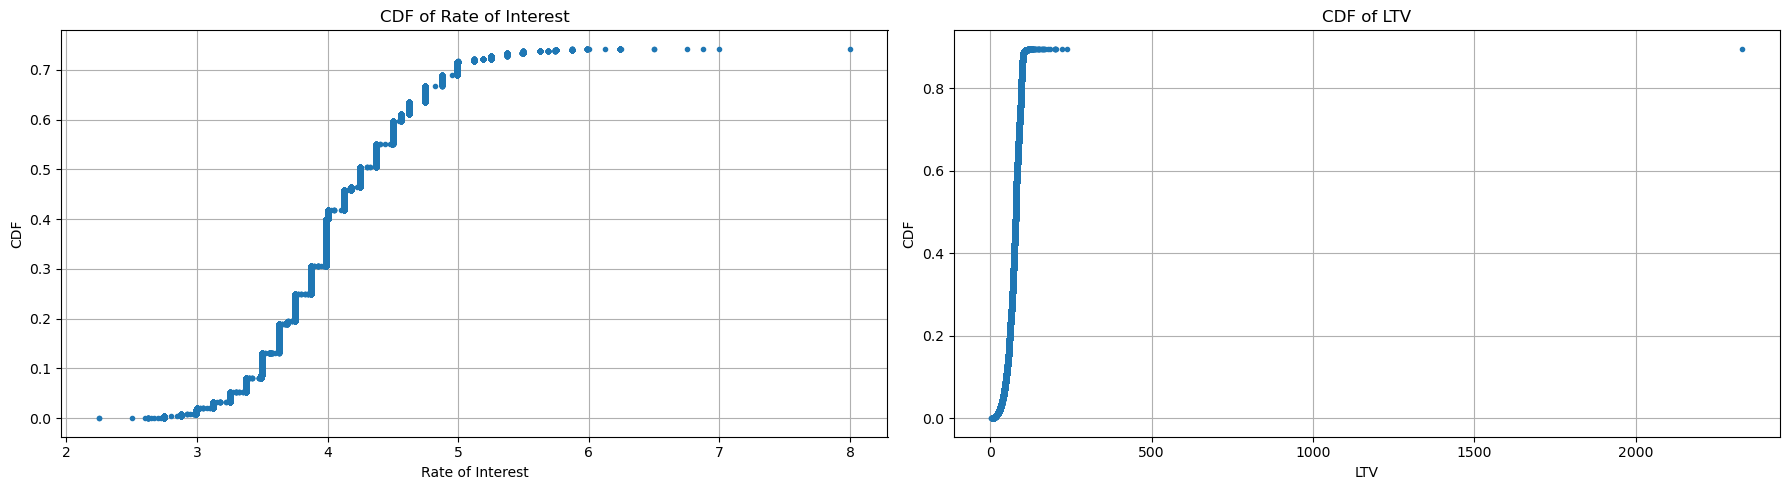

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# CDF for Rate of Interest
rate_of_interest_sorted = np.sort(df['rate_of_interest'])
rate_of_interest_cdf = np.arange(1, len(rate_of_interest_sorted) + 1) / len(rate_of_interest_sorted)
axes[0].plot(rate_of_interest_sorted, rate_of_interest_cdf, marker='.', linestyle='none')
axes[0].set_title('CDF of Rate of Interest')
axes[0].set_xlabel('Rate of Interest')
axes[0].set_ylabel('CDF')
axes[0].grid(True)

# CDF for LTV
ltv_sorted = np.sort(df['LTV'])
ltv_cdf = np.arange(1, len(ltv_sorted) + 1) / len(ltv_sorted)
axes[1].plot(ltv_sorted, ltv_cdf, marker='.', linestyle='none')
axes[1].set_title('CDF of LTV')
axes[1].set_xlabel('LTV')
axes[1].set_ylabel('CDF')
axes[1].grid(True)


plt.tight_layout()
plt.show()

Here, the CDF of the Rate of Interest shows that most loans have interest rates below 5%, while the The LTV distribution helps us understand that most of the data is concentrated with only exception for one extreme outlier, which skews the distribution.
These insights are valuable for understanding the overall lending landscape represented by the data.

### Histogram vs Kernel Density Plot

We are comparing the distributions of the variables rate of interest and loan-to-value (LTV) through histograms, Kernel Density Estimation (KDE) plots, and box plots. The goal is to observe the frequency and shape of these variables and to understand their distributions.

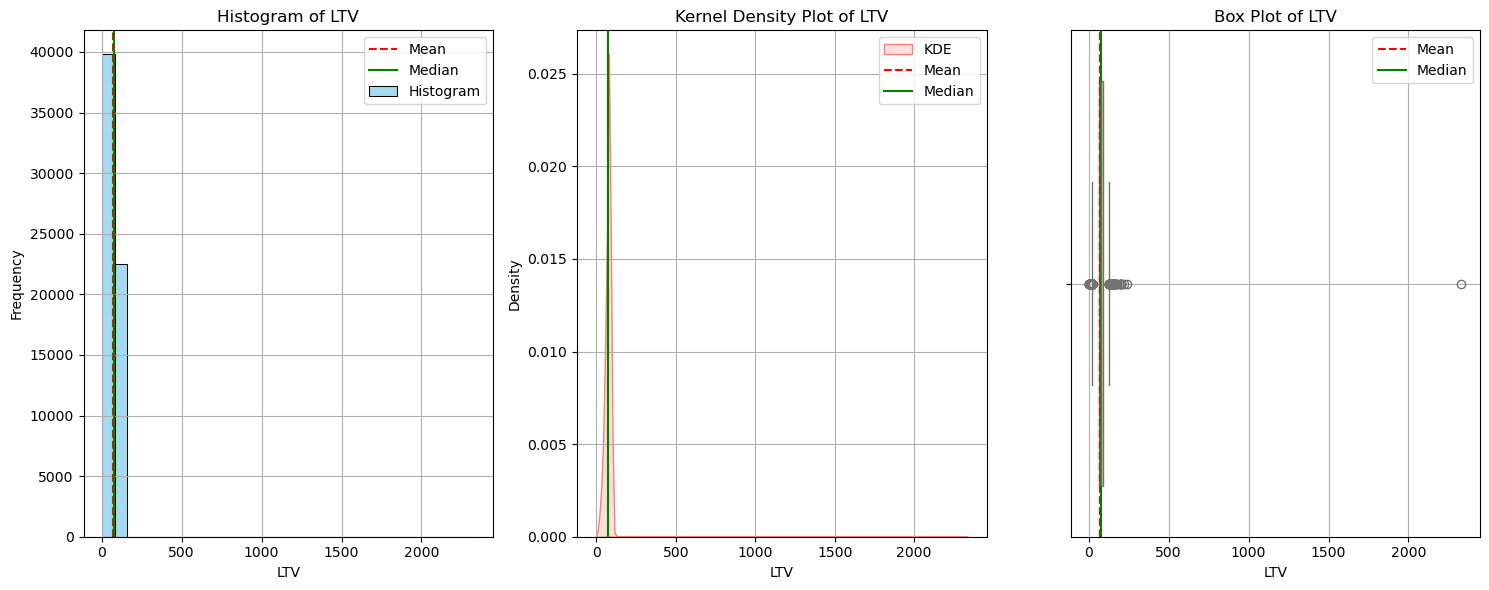

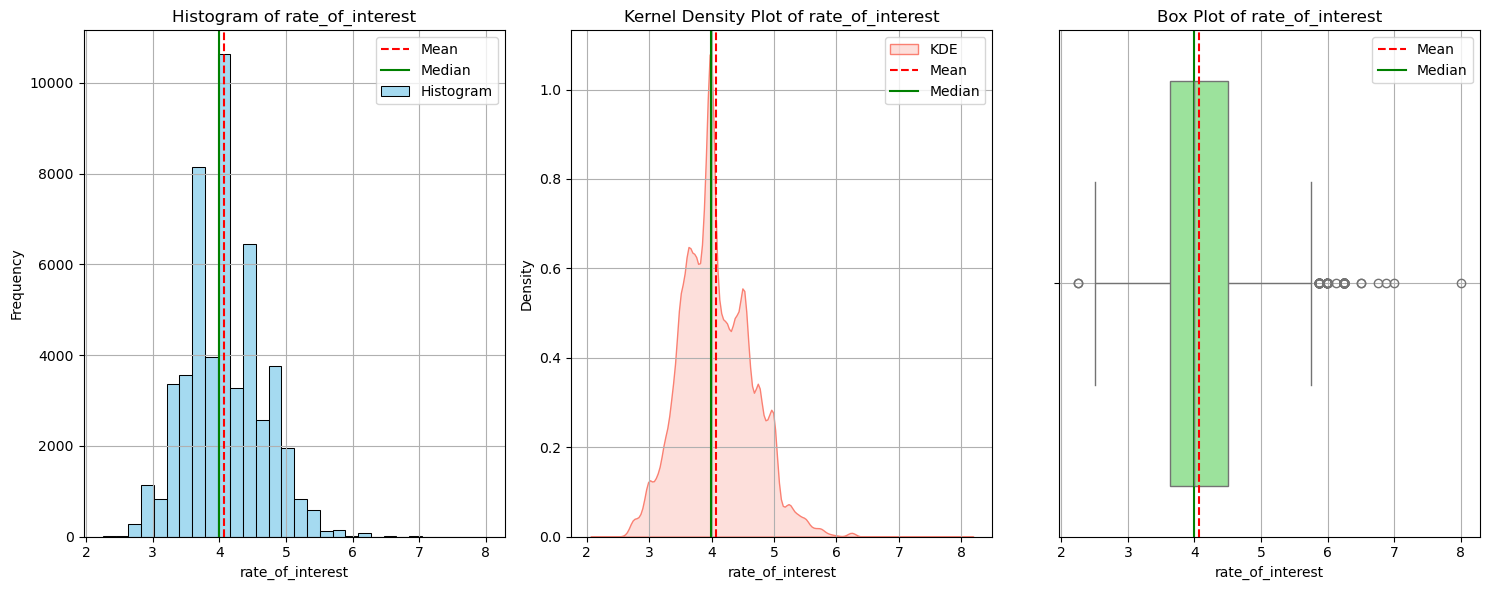

In [19]:
def plot_histogram_kde_box(column):

    # Calculate mean and median
    mean_value = df[column].mean()
    median_value = df[column].median()


    plt.figure(figsize=(15, 6))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[column], bins=30, kde=False, color='skyblue', label='Histogram')
    plt.axvline(mean_value, color='red', linestyle='--', label='Mean')
    plt.axvline(median_value, color='green', linestyle='-', label='Median')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)

    # Kernel Density Plot
    plt.subplot(1, 3, 2)
    sns.kdeplot(df[column], fill=True, color='salmon', label='KDE')
    plt.axvline(mean_value, color='red', linestyle='--', label='Mean')
    plt.axvline(median_value, color='green', linestyle='-', label='Median')
    plt.title(f'Kernel Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)

    # Box Plot
    plt.subplot(1, 3, 3)
    sns.boxplot(x=df[column], color='lightgreen')
    plt.axvline(mean_value, color='red', linestyle='--', label='Mean')
    plt.axvline(median_value, color='green', linestyle='-', label='Median')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_histogram_kde_box('LTV')
plot_histogram_kde_box('rate_of_interest')

Skewness and Kurtosis - LTV

In [20]:
# Dropping the missing values for now, as we cannot calculate the indicators with missing values.
df_ltv_cleaned = df['LTV'].dropna()

# Skewness
skewness = skew(df_ltv_cleaned, axis=0, bias=True)

# Kurtosis
kurtosis_value = kurtosis(df_ltv_cleaned, axis=0, bias=True)

print('Skewness:', skewness)
print('Kurtosis:', kurtosis_value)

Skewness: 19.774277822735954
Kurtosis: 2185.5365096568553


The calculated skewness of 19.774 indicates an extremely pronounced positive (right) skewness in the Loan To Value (LTV) distribution, suggesting a significantly longer right tail characterized by a vast number of smaller values and very few large values. The kurtosis value of 2185.537 indicates an heavy-tailed distribution with an extraordinary number of extreme values compared to a normal distribution. This suggests a sharp peak and pronounced tails, highlighting the presence of extreme outliers that greatly influence the overall distribution.

Skewness and Kurtosis - Rate of Interest

In [21]:
# Dropping the missing values for now, as we cannot calculate the indicators with missing values.
df_rate_of_interest_cleaned = df['rate_of_interest'].dropna()

# Calculate the skewness
skewness = skew(df_rate_of_interest_cleaned, axis=0, bias=True)
# Calculate the kurtosis
kurtosis_value = kurtosis(df_rate_of_interest_cleaned, axis=0, bias=True)

print('Skewness:', skewness)
print('Kurtosis:', kurtosis_value)

Skewness: 0.3683829257979962
Kurtosis: 0.20293924755958193


The calculated skewness of 0.368 indicates a slight positive (right) skewness in the distribution of the rate of interest, suggesting a modest tendency for a longer right tail. The kurtosis value of 0.203 reflects a distribution that is relatively flat compared to a normal distribution, indicating that it has fewer extreme values. This suggests a more uniform distribution of interest rates with a less pronounced peak and lighter tails.

## 2.6 Correlation

### Scatter Plot
In this section, we visualize the relationships between Loan-to-Value (LTV) and Gender, as well as Rate of Interest and Gender. This visualization helps identify trends in how loan amounts correlate with interest rates and highlights differences in borrowing behaviors between males and females. Overall, these plots provide valuable insights into the dynamics of borrowing.



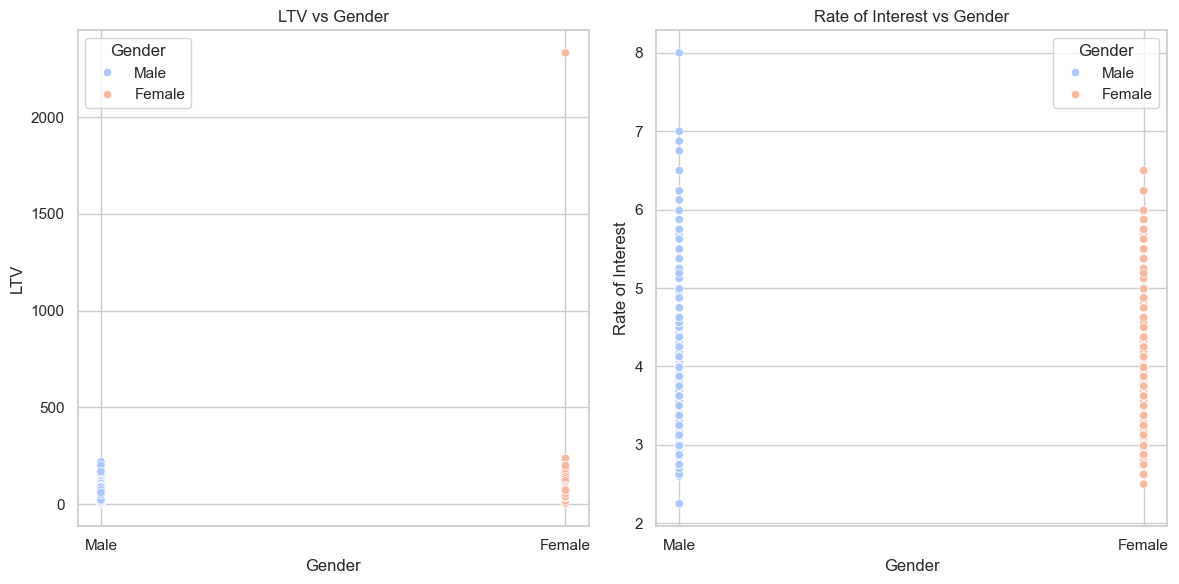

In [22]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# LTV vs Gender on the first axis
sns.scatterplot(x=df['Gender'], y=df['LTV'], hue=df['Gender'], palette='coolwarm', ax=axes[0])
axes[0].set_title('LTV vs Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('LTV')

# Rate of Interest vs Gender on the second axis
sns.scatterplot(x=df['Gender'], y=df['rate_of_interest'], hue=df['Gender'], palette='coolwarm', ax=axes[1])
axes[1].set_title('Rate of Interest vs Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Rate of Interest')

plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.show()

Based on the scatter plots, both genders exhibit similar LTV, though there is an extreme outlier in the female sample. The rate of interest appears higher for the male sample, with more frequent observations at the upper end.

### Spearman and Pearson Correlation Coefficients
In order to compute the correlation maps and see if there is any relationship with the gender variable, we first have to convert the Gender variable from Categorical to Integer

In [23]:
df = pd.get_dummies(df, columns=['Gender'])
df.head()

,ID,approv_in_adv,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,...,Secured_by,total_units,income,age,LTV,Region,Security_Type,Status,Gender_Female,Gender_Male
1,24891,nopre,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,...,home,1U,4980.0,55-64,NaN,North,direct,1,False,True
2,24892,pre,nopc,nob/c,406500,4.560,0.2000,595.00,360.0,neg_amm,...,home,1U,9480.0,35-44,80.019685,south,direct,0,False,True
3,24893,nopre,nopc,nob/c,456500,4.250,0.6810,NaN,360.0,not_neg,...,home,1U,11880.0,45-54,69.376900,North,direct,0,False,True
7,24897,nopre,nopc,nob/c,266500,4.125,0.2975,5609.88,360.0,not_neg,...,home,1U,3780.0,55-64,86.525974,North,direct,0,True,False
10,24900,nopre,nopc,b/c,136500,NaN,NaN,NaN,300.0,neg_amm,...,home,1U,4020.0,55-64,81.250000,North,direct,1,False,True


In [24]:
# Convert the dummy variable form Boolean to Int

df['Gender_Female'] = df['Gender_Female'].astype(int)
df['Gender_Male'] = df['Gender_Male'].astype(int)
df.head()

,ID,approv_in_adv,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,...,Secured_by,total_units,income,age,LTV,Region,Security_Type,Status,Gender_Female,Gender_Male
1,24891,nopre,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,...,home,1U,4980.0,55-64,NaN,North,direct,1,0,1
2,24892,pre,nopc,nob/c,406500,4.560,0.2000,595.00,360.0,neg_amm,...,home,1U,9480.0,35-44,80.019685,south,direct,0,0,1
3,24893,nopre,nopc,nob/c,456500,4.250,0.6810,NaN,360.0,not_neg,...,home,1U,11880.0,45-54,69.376900,North,direct,0,0,1
7,24897,nopre,nopc,nob/c,266500,4.125,0.2975,5609.88,360.0,not_neg,...,home,1U,3780.0,55-64,86.525974,North,direct,0,1,0
10,24900,nopre,nopc,b/c,136500,NaN,NaN,NaN,300.0,neg_amm,...,home,1U,4020.0,55-64,81.250000,North,direct,1,0,1


In [25]:
# Compute the Pearson correlation matrix
pearson_corr = df[['loan_amount', 'rate_of_interest','income','LTV','Status','Gender_Female','Gender_Male']].corr(method='pearson')

# Compute the Spearman correlation matrix
spearman_corr = df[['loan_amount', 'rate_of_interest','income','LTV','Status','Gender_Female','Gender_Male']].corr(method='spearman')

# Print the correlation matrices
print("Pearson Correlation Matrix:")
print(pearson_corr)
print("")

print("Spearman Correlation Matrix:")
print(spearman_corr)

Pearson Correlation Matrix:
                  loan_amount  rate_of_interest    income       LTV    Status  \
loan_amount          1.000000         -0.158039  0.440800  0.060579 -0.037342   
rate_of_interest    -0.158039          1.000000 -0.037636  0.009217       NaN   
income               0.440800         -0.037636  1.000000 -0.049489 -0.055037   
LTV                  0.060579          0.009217 -0.049489  1.000000  0.068219   
Status              -0.037342               NaN -0.055037  0.068219  1.000000   
Gender_Female       -0.098332          0.065464 -0.104577 -0.085748 -0.012007   
Gender_Male          0.098332         -0.065464  0.104577  0.085748  0.012007   

                  Gender_Female  Gender_Male  
loan_amount           -0.098332     0.098332  
rate_of_interest       0.065464    -0.065464  
income                -0.104577     0.104577  
LTV                   -0.085748     0.085748  
Status                -0.012007     0.012007  
Gender_Female          1.000000    -1.000

### Spearman Correlation Matix

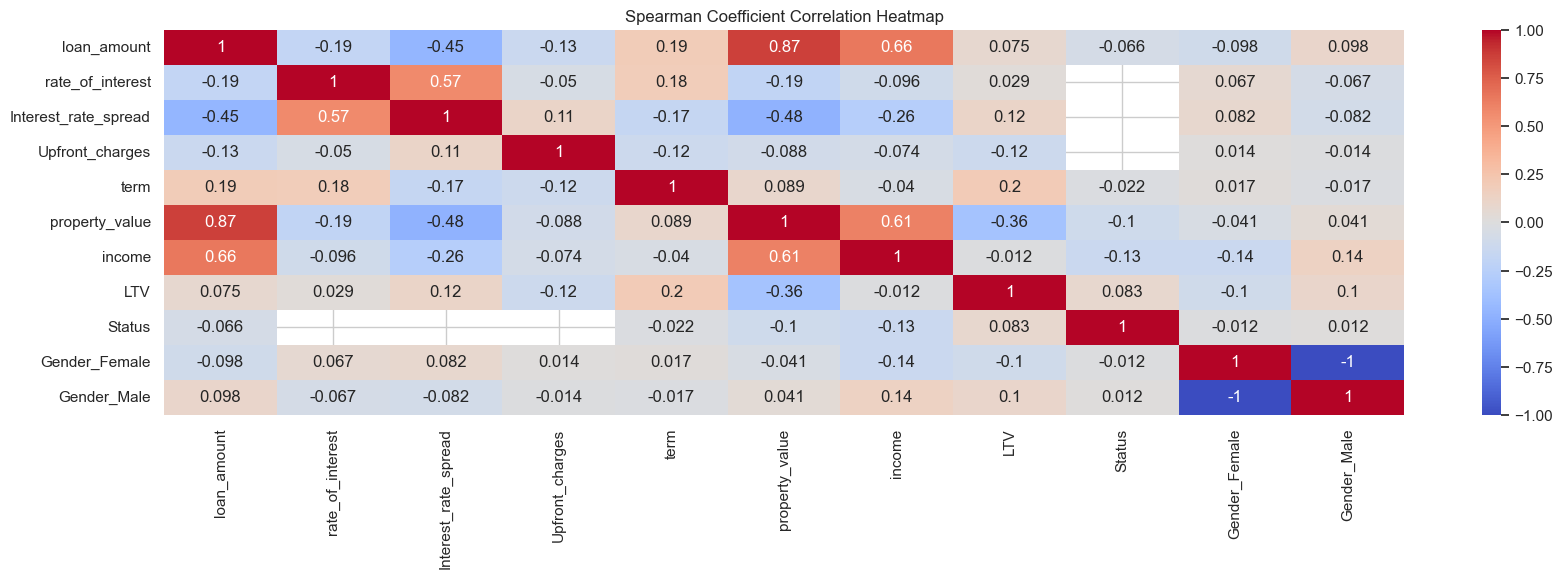

In [26]:
#Spearman Correlation Matrix

correlation_matrix = df[['loan_amount', 'rate_of_interest','Interest_rate_spread','Upfront_charges', 'term', 'property_value','income','LTV','Status','Gender_Female','Gender_Male']].corr(method='spearman')

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

# Set the title and labels
plt.title('Spearman Coefficient Correlation Heatmap')
plt.show()

### Pearson Correlation Matrix

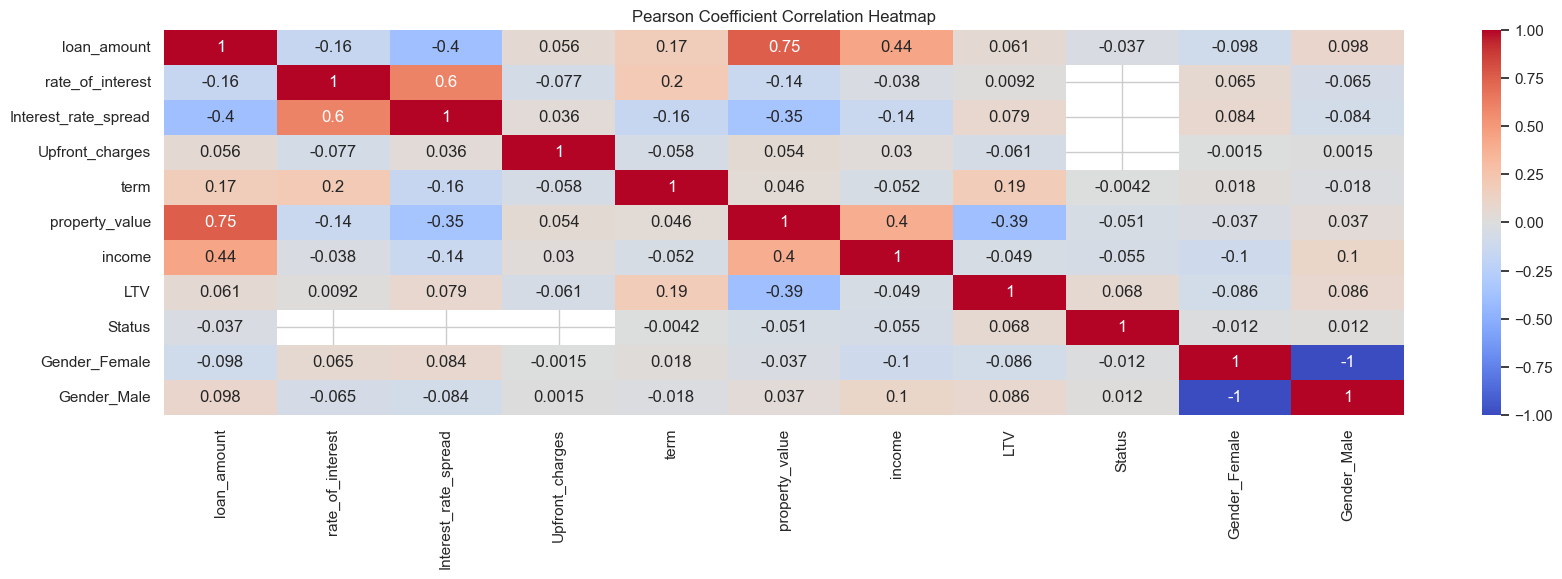

In [27]:
# Pearson Correlation Matrix

correlation_matrix = df[['loan_amount', 'rate_of_interest', 'Interest_rate_spread','Upfront_charges', 'term', 'property_value','income','LTV','Status','Gender_Female','Gender_Male']].corr(method='pearson')

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

# Set the title and labels
plt.title('Pearson Coefficient Correlation Heatmap')
plt.show()

**Loan Amount**<br>
Both correlation coefficients indicate a slightly negative relationship between being a female and receiving a lower loan amount.

**Rate of Interest**<br>
Weak positive relationship between gender (female) and rate of interest (Spearman: 0.060741 / Pearson: 0.061854).
Females might be facing slightly higher interest rates compared to their counterparts

**LTV**<br>
showing a weak negative relationship (Pearson: -0.056153 / Spearman:-0.058549)<br>

**Status**<br>
Very weak correlation on both coefficients.

### Covariance

In [28]:
# Computing the covariance for loan_amount, rate_of_interest, and Status (including Gender_encoded)
cov_matrix = df[['loan_amount', 'rate_of_interest', 'Status','LTV', 'Gender_Female', 'Gender_Male']].cov()

# Displaying the covariance
cov_matrix

,loan_amount,rate_of_interest,Status,LTV,Gender_Female,Gender_Male
loan_amount,3.115949e+10,-14779.556033,-2883.016114,221577.947688,-8472.789846,8472.789846
rate_of_interest,-1.477956e+04,0.306302,0.000000,0.106429,0.017713,-0.017713
Status,-2.883016e+03,0.000000,0.191293,0.536463,-0.002563,0.002563
LTV,2.215779e+05,0.106429,0.536463,436.912635,-0.875240,0.875240
Gender_Female,-8.472790e+03,0.017713,-0.002563,-0.875240,0.238271,-0.238271
Gender_Male,8.472790e+03,-0.017713,0.002563,0.875240,-0.238271,0.238271


The covariance between Gender_Female and rate_of_interest, is about 0.017713, suggesting a very weak positive relationship. This implies that as the number of female borrowers rises, there may be a slight tendency for interest rates to increase, although this effect is minimal.

## 2.7 Data Curation and Preparation for Inferential Analysis

In this section, we aim to address missing values and outliers. We will examine the NaN values in our variables of interest, and then review their distributions to identify the appropriate approach for substituting them. During this phase, we will also identify and handle outliers.

### 2.7.1 Missing values

The next step involves looking for missing values within the dataset.

In [29]:
# Look for missing values
missing_values = df.isnull().sum()
missing_values

ID                            0
approv_in_adv               434
open_credit                   0
business_or_commercial        0
loan_amount                   0
rate_of_interest          17939
Interest_rate_spread      17939
Upfront_charges           19327
term                         19
Neg_ammortization            61
interest_only                 0
lump_sum_payment              0
property_value             7307
occupancy_type                0
Secured_by                    0
total_units                   0
income                     3455
age                           0
LTV                        7307
Region                        0
Security_Type                 0
Status                        0
Gender_Female                 0
Gender_Male                   0
dtype: int64

#### Plotting the missing values

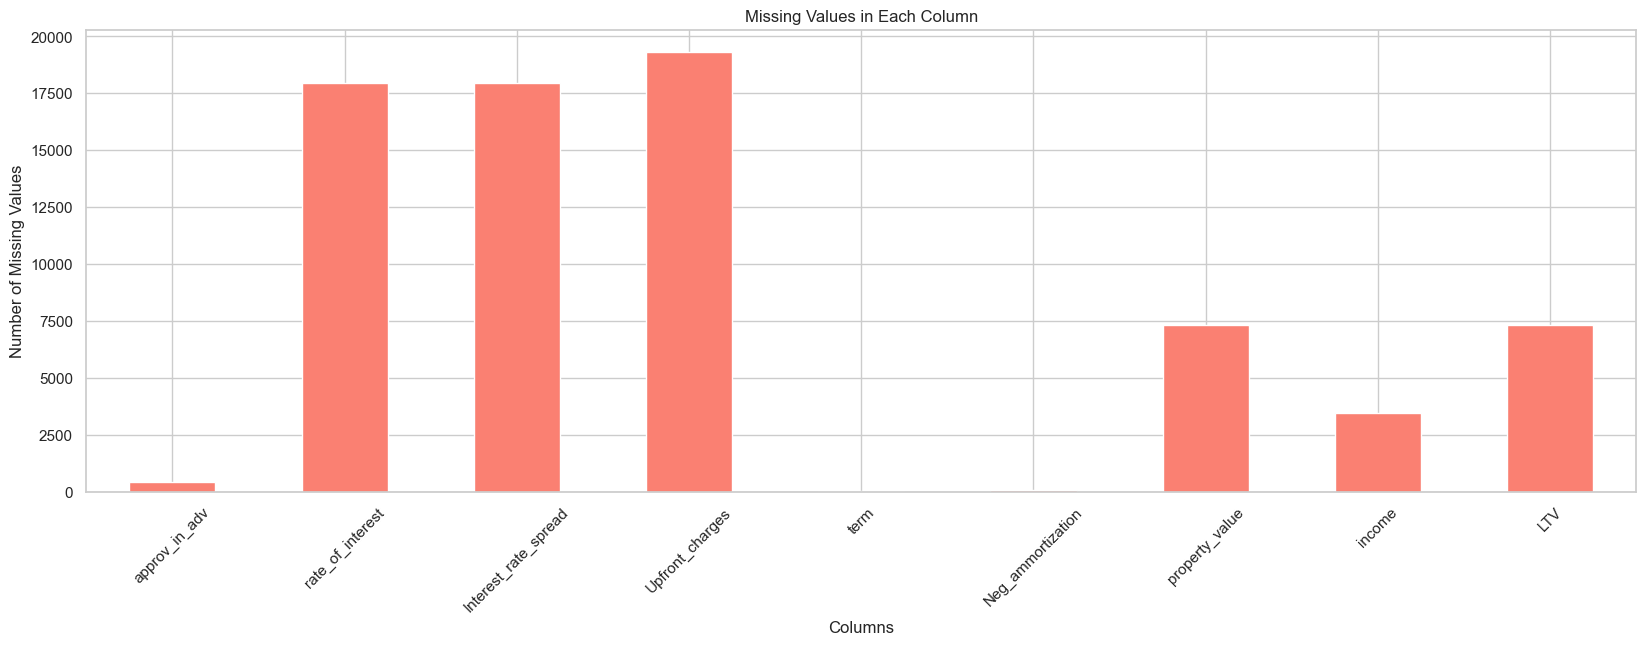

In [30]:
# Create a bar plot
plt.figure(figsize=(20, 6))
missing_values[missing_values > 0].plot(kind='bar', color='salmon')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

Plotting missing values helps quickly identify which columns need data cleaning. This ensures a more accurate analysis by addressing gaps in the dataset.

Among the variables with missing values, our focus shifts to the following:
- "rate_of_interest"
- "LTV"

We will first examine the summary statistic table and the distribution of these variables to understand their characteristics. Based on this analysis, we will determine the most appropriate strategy for handling missing values and outliers.

In [31]:
# Summary statistics table that shows the number of observations, the mean, the standard deviation, the min, the max, and the correlation for the variables
# 'Rate of Interest', 'LTV', 'income' and 'Loan Amount'.

# Select our columns
data = df[['rate_of_interest','LTV']]

# Calculate summary statistics
summary_stats = data.describe().T[['count', 'mean', 'std','min', 'max']]

# Calculate variance
summary_stats['variance'] = data.var()

# Calculate correlations with other variables
correlations = data.corr()

# Merge summary statistics and correlation information
summary_table = summary_stats.join(correlations, lsuffix='_stat')

# Rename the columns for clarity
summary_table.columns = [
    'N',
    'Mean',
    'S.D.',
    'Min',
    'Max',
    'Variance',
    '(1)',
    '(2)'
]

# rename row index
summary_table = summary_table.rename(index={'rate_of_interest' : "(1) Rate of Interest",'LTV': "(2) LTV"})

# Print the summary table
summary_table = np.round(summary_table,2)
summary_table


,N,Mean,S.D.,Min,Max,Variance,(1),(2)
(1) Rate of Interest,51673.0,4.07,0.55,2.25,8.00,0.31,1.00,0.01
(2) LTV,62305.0,73.16,20.90,3.08,2331.25,436.91,0.01,1.00


### 2.7.2 Data Cleaning Rate of interest
As we identified in our data curation section, the variable "rate_of_interest" contains missing values.<br>
We will now analyze these missing values and explore the distribution of the available values, as well as potential substitution methods for handling the missing data.

#### Handle Missing Values

In [32]:
# Missing data for 'rate_of_interest
rate_of_interest_missing = df['rate_of_interest'].isnull().sum()
print(f'Rate of Interest missing values: {rate_of_interest_missing:,.2f}')

Rate of Interest missing values: 17,939.00


#### Distribution of 'rate_of_interest'

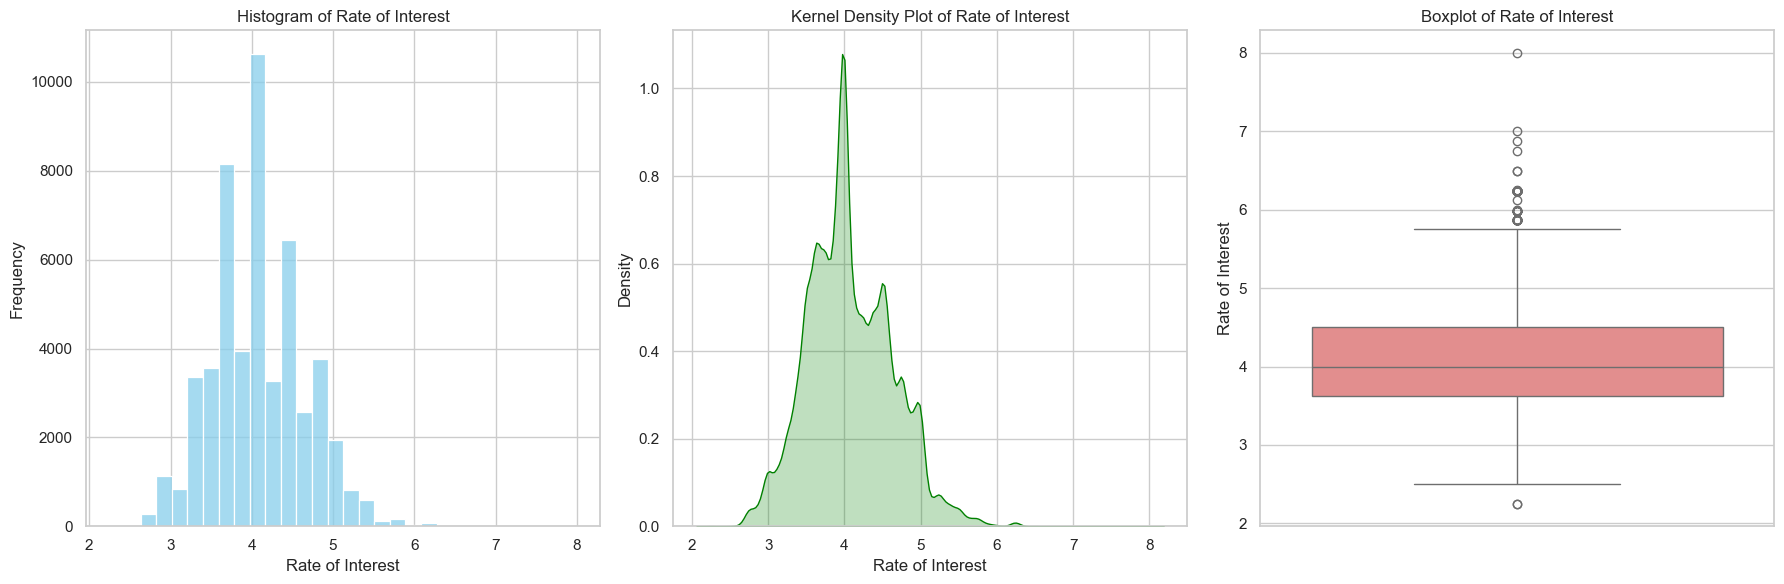

In [33]:
# Plot the distribution of Rate of Interest using both histogram and KDE
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram of Rate of Interest
sns.histplot(df['rate_of_interest'], bins=30, kde=False, color='skyblue', ax=axes[0])
axes[0].set_title('Histogram of Rate of Interest')
axes[0].set_xlabel('Rate of Interest')
axes[0].set_ylabel('Frequency')

# Kernel Density Plot of Rate of Interest
sns.kdeplot(df['rate_of_interest'], fill=True, color='green', ax=axes[1])
axes[1].set_title('Kernel Density Plot of Rate of Interest')
axes[1].set_xlabel('Rate of Interest')
axes[1].set_ylabel('Density')

# Boxplot of Rate of Interest to visualize outliers
sns.boxplot(data=df, y='rate_of_interest', color='lightcoral', ax=axes[2])
axes[2].set_title('Boxplot of Rate of Interest')
axes[2].set_ylabel('Rate of Interest')


plt.tight_layout()
plt.show()

Subsitute the missing values with the median.

Key Take Aways:

- The mean (4.07) and the standard deviation (0.55) tell us that the majority of our data falls in the interval between 3.52 and 4.62.
The plots indicate a light right-skewed (positive) distribution, with several outliers present in the right tail.<br>
- We can now decide how to handle the missing values. Since there are still some outliers, we will replace the NaN values with the median because it is more robust at handling outliers than the mean.

#### Substitute missing values

In [34]:
# Calculate the median of the non-null values
median_rate = df['rate_of_interest'].median()

print ('The median rate is:',median_rate)

# Fill missing values with the median
df['rate_of_interest'] = df['rate_of_interest'].fillna(median_rate)

The median rate is: 3.99


#### Sensitivity check
Are missing values still present?

In [35]:
# Check if our code worked by looking again for missing values
df['rate_of_interest'].isnull().sum()

0

All missing values for the variable "rate_of_interest" have been successfully substituted.

#### Updated distribution

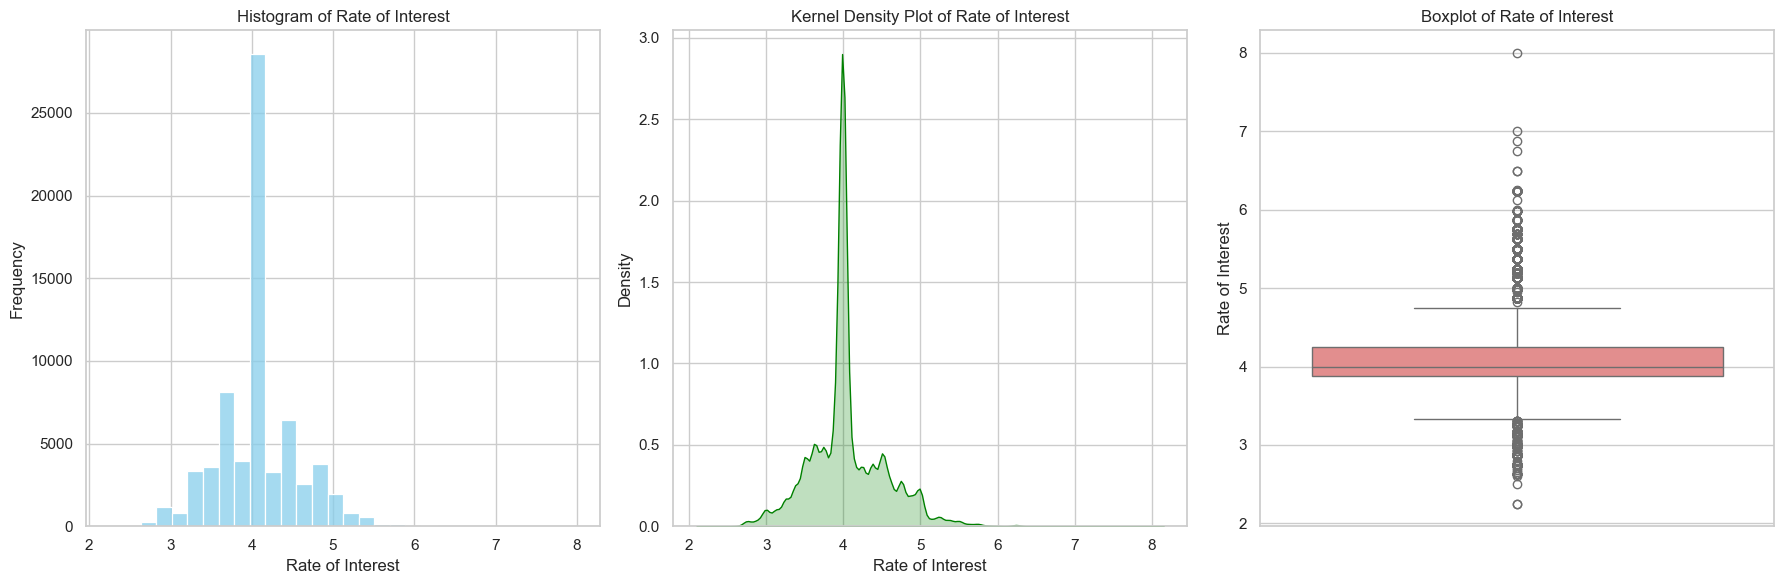

In [36]:
# Plot the distribution of Rate of Interest using both histogram and KDE
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram of Rate of Interest
sns.histplot(df['rate_of_interest'], bins=30, kde=False, color='skyblue', ax=axes[0])
axes[0].set_title('Histogram of Rate of Interest')
axes[0].set_xlabel('Rate of Interest')
axes[0].set_ylabel('Frequency')

# Kernel Density Plot of Rate of Interest
sns.kdeplot(df['rate_of_interest'], fill=True, color='green', ax=axes[1])
axes[1].set_title('Kernel Density Plot of Rate of Interest')
axes[1].set_xlabel('Rate of Interest')
axes[1].set_ylabel('Density')

# Boxplot of Rate of Interest to visualize outliers
sns.boxplot(data=df, y='rate_of_interest', color='lightcoral', ax=axes[2])
axes[2].set_title('Boxplot of Rate of Interest')
axes[2].set_ylabel('Rate of Interest')


plt.tight_layout()
plt.show()

All missing values for the variable "rate_of_interest" have been replaced, but the distribution has not improved due to the presence of many outliers.

#### Handle outliers
We will now check the threshold where 95% of our data falls to identify which outliers we can remove.

##### Check the threshold where 95% of our data falls.

In [37]:
# Calculate the 95th percentile value
Q95 = np.percentile(df['rate_of_interest'], 95)

# Count the number of observations above the 95th percentile
observations_above_Q95 = df[df['rate_of_interest'] > Q95].shape[0]

# Print the result
print(f'Number of observations above the 95th percentile ({Q95}): {observations_above_Q95:,.2f}')


Number of observations above the 95th percentile (4.99): 1,818.00


The 95th percentile tells us that 95% of our data are below or equal 4.99 while from the box plot we can conclude that extreme outliers are above an interest rate of 6.00.<br>
While outliers are often present in datasets, we aim to normalize the data and exclude extreme outliers >6.00% as well as those below the 1% threshold, as we assume they are likely errors in the dataset. The goal is to enhance the quality of our analysis.

**Conclusion**: We drop the obeservations that are greater the value of 6.00 and below the value of 1.00 in the variable rate_of_interest.

#### Drop Outliers

In [38]:
# Drop rows where rate_of_interest is below 1 or above 6
df = df[(df['rate_of_interest'] >= 1) & (df['rate_of_interest'] <= 6)]


#### Plot the distribution

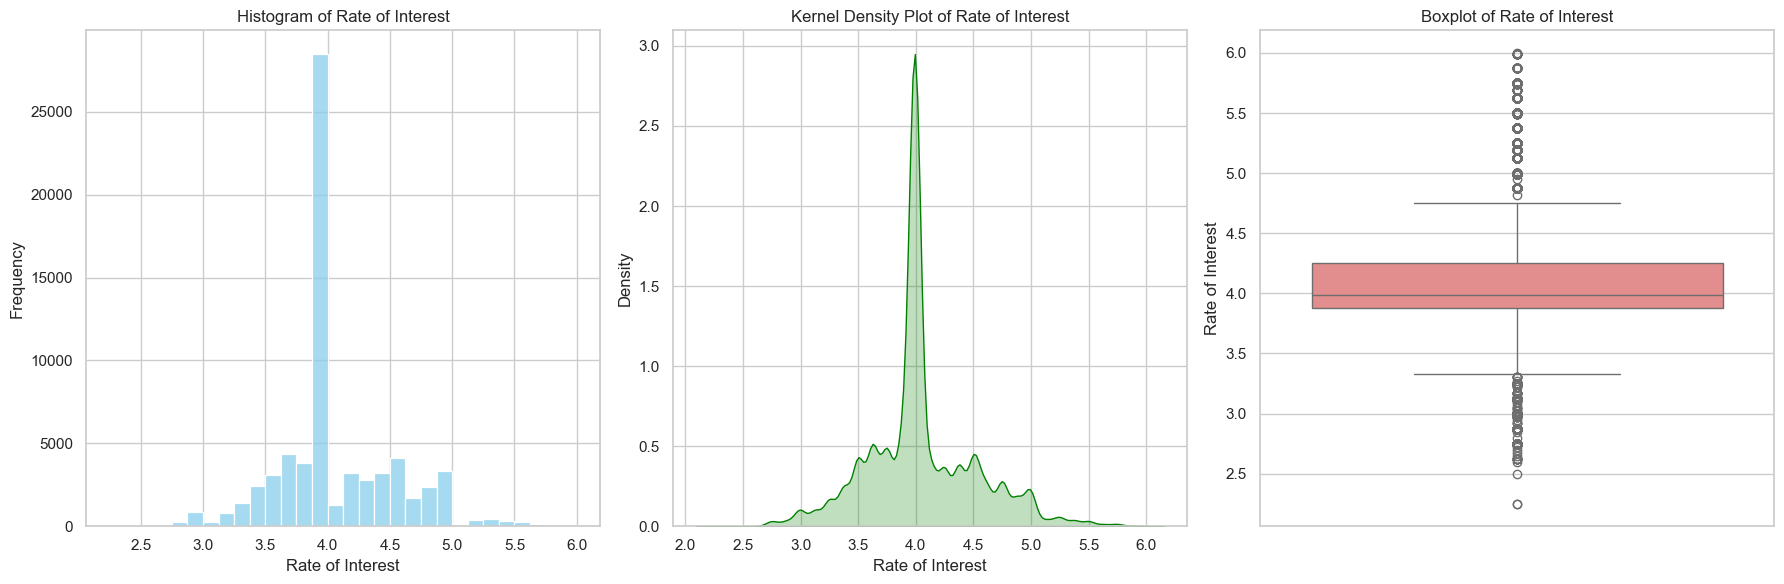

In [39]:
# Plot the distribution of Rate of Interest using both histogram and KDE
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram of Rate of Interest
sns.histplot(df['rate_of_interest'], bins=30, kde=False, color='skyblue', ax=axes[0])
axes[0].set_title('Histogram of Rate of Interest')
axes[0].set_xlabel('Rate of Interest')
axes[0].set_ylabel('Frequency')

# Kernel Density Plot of Rate of Interest
sns.kdeplot(df['rate_of_interest'], fill=True, color='green', ax=axes[1])
axes[1].set_title('Kernel Density Plot of Rate of Interest')
axes[1].set_xlabel('Rate of Interest')
axes[1].set_ylabel('Density')

# Boxplot of Rate of Interest to visualize outliers
sns.boxplot(data=df, y='rate_of_interest', color='lightcoral', ax=axes[2])
axes[2].set_title('Boxplot of Rate of Interest')
axes[2].set_ylabel('Rate of Interest')


plt.tight_layout()
plt.show()

The variable 'rate_of_interest' now shows a normal distribution, and the outliers have been effectively addressed.

### 2.7.3 Data Cleaning Loan To Value (LTV)

#### Handle Missing Values

In [40]:
# Missing data for 'LTV' variable
ltv_missing = df['LTV'].isnull().sum()
print(f'LTV missing values: {ltv_missing:,.2f}')

LTV missing values: 7,307.00


#### Distribution for the variable 'LTV'

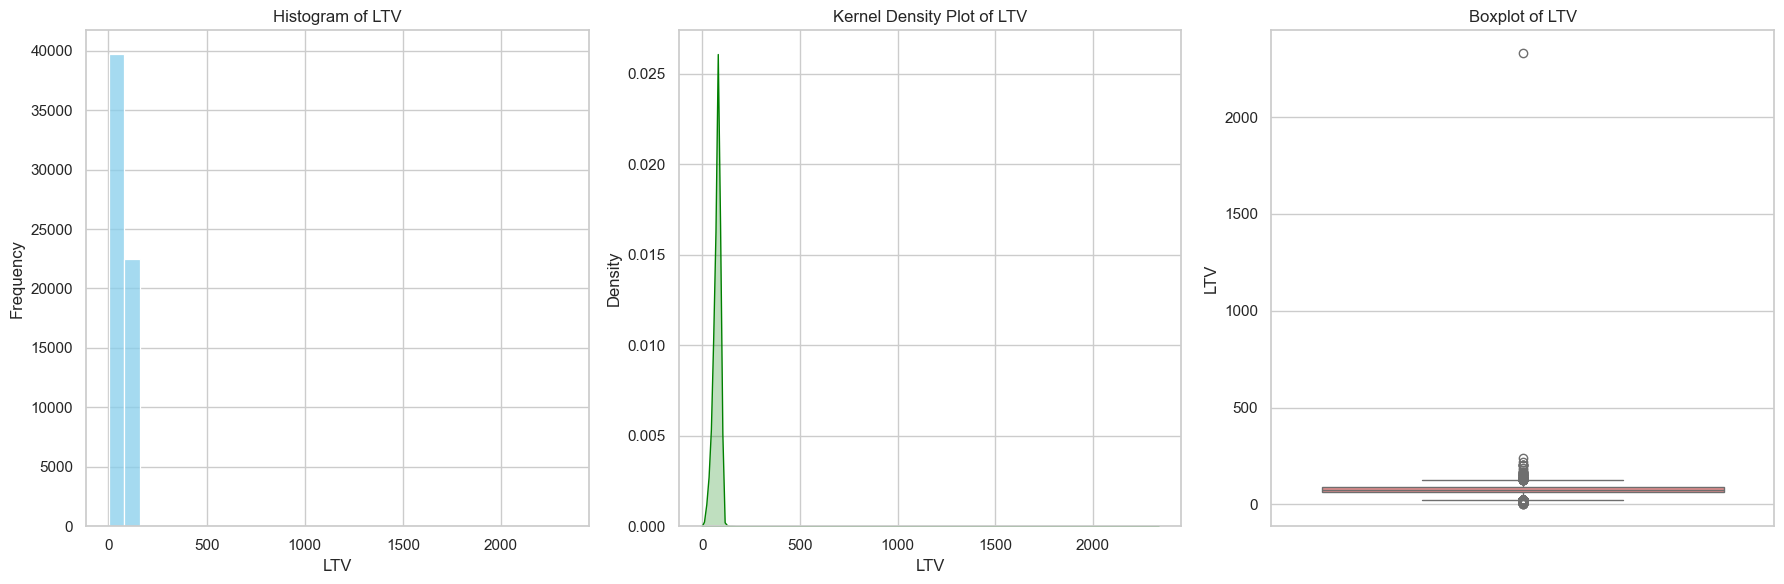

In [41]:
# Plot the distribution of LTV using both histogram and KDE
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram of LTV
sns.histplot(df['LTV'], bins=30, kde=False, color='skyblue', ax=axes[0])
axes[0].set_title('Histogram of LTV')
axes[0].set_xlabel('LTV')
axes[0].set_ylabel('Frequency')

# Kernel Density Plot of LTV
sns.kdeplot(df['LTV'], fill=True, color='green', ax=axes[1])
axes[1].set_title('Kernel Density Plot of LTV')
axes[1].set_xlabel('LTV')
axes[1].set_ylabel('Density')

# Boxplot of LTV to visualize outliers
sns.boxplot(data=df, y='LTV', color='lightcoral', ax=axes[2])
axes[2].set_title('Boxplot of LTV')
axes[2].set_ylabel('LTV')


plt.tight_layout()
plt.show()

By analyzing the data distribution, we observe that the presence of outliers is skewing the distribution.

Since we had to drop some rows while normalizing the previous variable, we are recalculating the basic statistics for the LTV variable.

In [42]:
# Basic statistic information regarding the variable loan amount
print('LTV')
variance = df['LTV'].var()
print(f'var         {variance:,.2f}')
print(df['LTV'].describe().apply(lambda x: f'{x:,.2f}'))

LTV
var         434.06
count    62,229.00
mean         73.21
std          20.83
min           3.08
25%          61.41
50%          75.57
75%          87.08
max       2,331.25
Name: LTV, dtype: object


The mean (73.21) and the standard deviation (20.83) indicate that 68% of our data (one standard deviation from the mean) falls within the interval between 52.38 and 94.04.<br>
The minimum value (3.08) and maximum value (2,331.25) suggest a substantial range of dispersion within the dataset.<br>
The plots show a significant right-skewed distribution, indicating the presence of severe positive outliers.<br>

According to our findings from Investopedia, a LTV (Loan-to-Value) ratio greater than 100 is considered unlikely and can be classified as an outlier. The LTV ratio represents the loan amount as a percentage of the property's value. Typically, LTV values range from 0% to 100%, with values exceeding 100% indicating that the loan amount surpasses the collateral's value. Such scenarios are uncommon and pose significant risks in most lending situations.

While these scenarios are not common, they are still possible. Therefore, we have chosen 150 as a threshold and will consider any LTV value above this as a severe outlier or error.

In summary, setting 150 as a threshold helps filter out potential outliers or errors in the data, as values significantly above this limit are rare and may not reflect standard lending practices.
Source(https://www.investopedia.com/terms/l/loantovalue.asp)

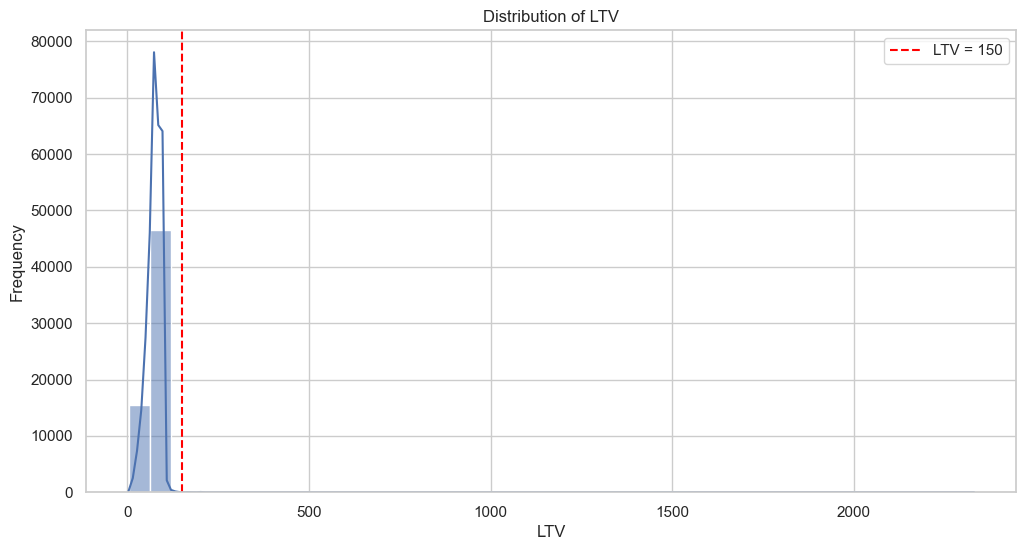

In [43]:
# Check where 150 relays in our data

plt.figure(figsize=(12, 6))
sns.histplot(df["LTV"], bins=40, kde=True)
plt.axvline(x=150, color='red', linestyle='--', label='LTV = 150')
plt.title('Distribution of LTV')
plt.xlabel('LTV')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Handle Outliers
We identify the exact number of outliers that exceed the value of 150

In [44]:
LTV_outliers = df[df["LTV"] > 150]["LTV"].count()

print(f'In total we have n. {LTV_outliers} outliers with a Loan To Value (LTV) exceeding 150')


In total we have n. 18 outliers with a Loan To Value (LTV) exceeding 150


Based on the histogram and density plots, it is evident that the LTV variable does not follow a normal distribution. The boxplot highlights the presence of few distinct outliers that we identified as n.18 exceeding the value of 150 .

Given the small number of these extreme values, we have opted to drop them. This decision aims to enhance the reliability of our overall analysis and improve the accuracy of our inferences.

We drop the outliers that exceed this threshold.

In [45]:
# Filter for LTV <= 150 while keeping NaN values. Drop the outliers
filtered_df = df[(df["LTV"] <= 150) | (df["LTV"].isna())]

# Assing the filtered data to our dataset
df = filtered_df

#### Updated distribution

Here, we are checking the updated distribution of the LTV variable after removing the outliers.

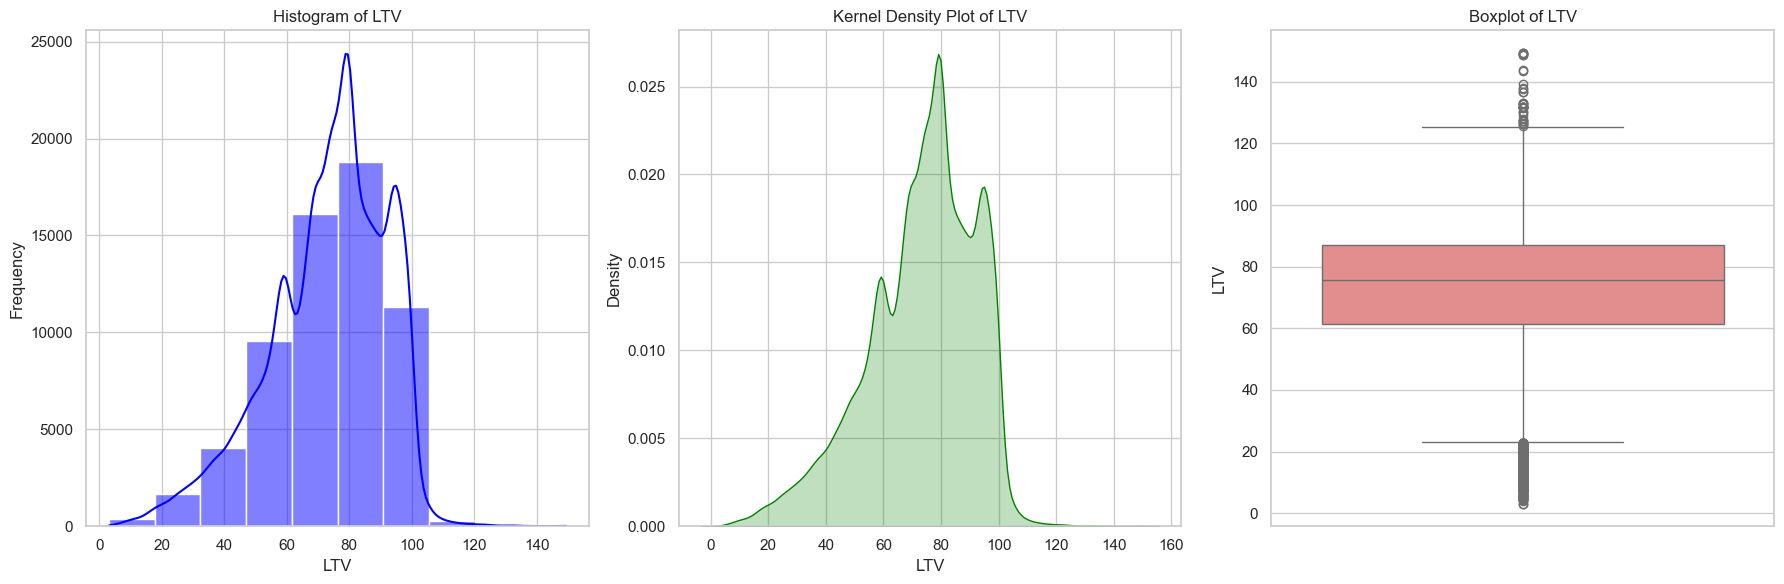

In [46]:
# Plot the distribution of LTV using both histogram and KDE
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram of LTV
sns.histplot(df['LTV'], bins=10, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Histogram of LTV')
axes[0].set_xlabel('LTV')
axes[0].set_ylabel('Frequency')

# Kernel Density Plot of LTV
sns.kdeplot(df['LTV'], fill=True, color='green', ax=axes[1])
axes[1].set_title('Kernel Density Plot of LTV')
axes[1].set_xlabel('LTV')
axes[1].set_ylabel('Density')

# Boxplot of LTV to visualize outliers
sns.boxplot(data=df, y='LTV', color='lightcoral', ax=axes[2])
axes[2].set_title('Boxplot of LTV')
axes[2].set_ylabel('LTV')


plt.tight_layout()
plt.show()

Now that we have a more clear visualization of the distribution of out data, we can determine how to handle the missing values.

Given the slight left skew in our distribution, we will substitute the missing values with the median. The median is a robust measure of central tendency that minimizes the influence of extreme values, ensuring the integrity of our dataset for further analysis

In [47]:
#Calculate the median of the non-NaN values
median_LTV = df['LTV'].median()
print(f'The median of the non-NaN values is: {median_LTV}')

# Step 2: Fill NaN values with the median
df['LTV'] = df['LTV'].fillna(median_LTV)
print('Values have successfully been replaced.')

The median of the non-NaN values is: 75.56818182
Values have successfully been replaced.


#### Sensitivity Check
 Are there missing values still present?

In [48]:
# Missing data for 'rate_of_interest
rate_of_interest_missing = df['LTV'].isnull().sum()
print('LTV missing values:', rate_of_interest_missing)

LTV missing values: 0


In [49]:
# Count the number of values between 0 and 20 in the 'LTV' column
ltv_between_0_and_20 = df['LTV'].between(0, 10).sum()

print(f"Number of values between 0 and 20 in LTV: {ltv_between_0_and_20}")

Number of values between 0 and 20 in LTV: 79


#### Skewness and Kurtosis

In [50]:
# Calculate the skewness
print('skewness:', str(skew(df.LTV, axis=0, bias=True)))
# Calculate the kurtosis
print('kurtosis:', str(kurtosis(df.LTV, axis=0, bias=True)))

skewness: -0.7613373605981104
kurtosis: 0.7143739981515274


The skewness of -0.767 indicates a moderate left skew, with more values on the higher side and a longer left tail. The kurtosis of 0.714 suggests a platykurtic distribution, meaning it has lighter tails and fewer outliers than a normal distribution.
Overall, the data is moderately left-skewed and flatter than normal.

Since the distribution of our 'LTV' variable is slightly left-skewed, we will explore transformations that can help achieve a more normal distribution. Specifically, we will investigate the log transformation and the square root transformation, as these are the two most commonly recommended methods for addressing left-skewed distributions.

#### LTV - Square Root Transformation

In the next section, we apply the square root transformation to attempty to normalize the distribution of LTV (Loan-to-Value) in the dataset.

In [51]:
df['LTV_sqrt'] = np.sqrt(df['LTV'])

In [52]:
# Calculate the skewness
print('skewness:', str(skew(df.LTV_sqrt, axis=0, bias=True)))
# Calculate the kurtosis
print('kurtosis:', str(kurtosis(df.LTV_sqrt, axis=0, bias=True)))

skewness: -1.3266634852273775
kurtosis: 2.5775110741398164


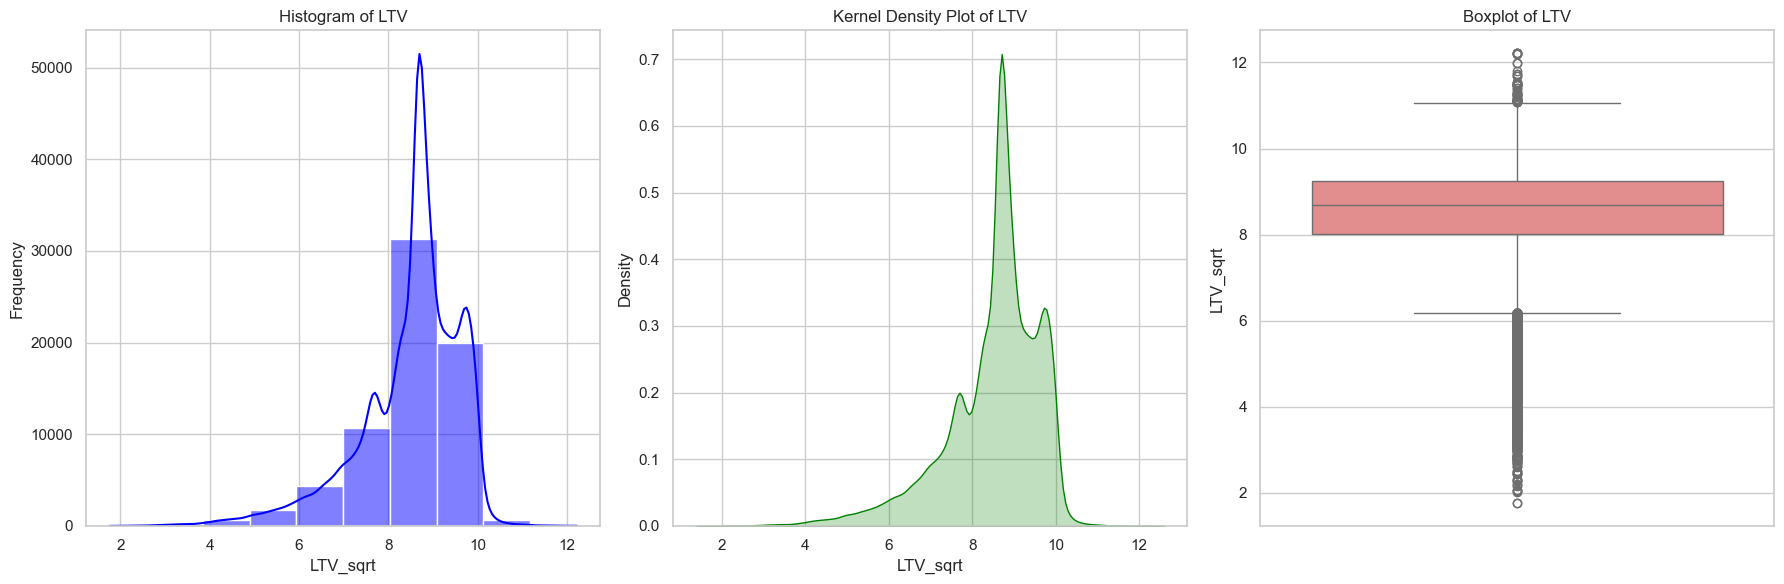

In [53]:
# Plot the distribution of LTV using both histogram and KDE
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram of LTV
sns.histplot(df['LTV_sqrt'], bins=10, kde=True, color='blue', ax=axes[0])
axes[0].set_title('Histogram of LTV')
axes[0].set_xlabel('LTV_sqrt')
axes[0].set_ylabel('Frequency')

# Kernel Density Plot of LTV
sns.kdeplot(df['LTV_sqrt'], fill=True, color='green', ax=axes[1])
axes[1].set_title('Kernel Density Plot of LTV')
axes[1].set_xlabel('LTV_sqrt')
axes[1].set_ylabel('Density')

# Boxplot of LTV to visualize outliers
sns.boxplot(data=df, y='LTV_sqrt', color='lightcoral', ax=axes[2])
axes[2].set_title('Boxplot of LTV')
axes[2].set_ylabel('LTV_sqrt')


plt.tight_layout()
plt.show()

Even though the normal distibution has not be reached, after the transformation, the skewness and kurtosis of the data were significantly reduced, indicating that the distribution is closer to normality than before. This transformation helps in making statistical modeling more reliable and improves interpretability of results.

In [54]:
# Summary statistics table that shows the number of observations, the mean, the standard deviation, the min, the max, and the correlation for the variables
# 'Rate of Interest', 'LTV', 'income' and 'Loan Amount'.

# Select our columns
data = df[['rate_of_interest','LTV','income']]

# Calculate summary statistics
summary_stats = data.describe().T[['count', 'mean', 'std','min', 'max']]

# Calculate variance
summary_stats['variance'] = data.var()

# Calculate correlations with other variables
correlations = data.corr()

# Merge summary statistics and correlation information
summary_table = summary_stats.join(correlations, lsuffix='_stat')

# Rename the columns for clarity
summary_table.columns = [
    'N',
    'Mean',
    'S.D.',
    'Min',
    'Max',
    'Variance',
    '(1)',
    '(2)',
    '(3)'
]

# rename row index
summary_table = summary_table.rename(index={'rate_of_interest' : "(1) Rate of Interest",'LTV': "(2) LTV",'income':"(3) Income"})

# Print the summary table
summary_table = np.round(summary_table,2)
summary_table


,N,Mean,S.D.,Min,Max,Variance,(1),(2),(3)
(1) Rate of Interest,69518.0,4.05,0.47,2.25,6.00,0.22,1.00,0.02,-0.03
(2) LTV,69518.0,73.40,17.68,3.08,149.36,312.61,0.02,1.00,-0.04
(3) Income,66065.0,6276.25,6136.87,0.00,335880.00,37661115.90,-0.03,-0.04,1.00


## 2.8 Summary statistic table

In [55]:
# Summary statistics table that shows the number of observations, the mean, the standard deviation, the min, the max, and the correlation for the variables
#'Loan Amount', 'Rate of Interest', 'LTV'.

# Select relevant columns
data = df[['loan_amount', 'rate_of_interest', 'LTV']]

# Calculate summary statistics
summary_stats = data.describe().T[['count', 'mean', 'std', 'min', 'max']]

# Calculate correlations with other variables
correlations = data.corr()

# Merge summary statistics and correlation information
summary_table = summary_stats.join(correlations, lsuffix='_stat')

# Rename the columns for clarity
summary_table.columns = [
    'N',
    'Mean',
    'S.D.',
    'Min',
    'Max',
    '(1)',
    '(2)',
    '(3)'
]

# rename row index
summary_table = summary_table.rename(index={'loan_amount' : "(1) Loan Amount", 'rate_of_interest' : "(2) Rate of Interest", 'LTV': "(3) LTV"})

# Print the summary table
summary_table = np.round(summary_table,2)
summary_table


,N,Mean,S.D.,Min,Max,(1),(2),(3)
(1) Loan Amount,69518.0,317687.75,176494.33,16500.00,3576500.00,1.00,-0.12,0.06
(2) Rate of Interest,69518.0,4.05,0.47,2.25,6.00,-0.12,1.00,0.02
(3) LTV,69518.0,73.40,17.68,3.08,149.36,0.06,0.02,1.00


## 2.9 T-Test for Group Comparison

To investigate whether female borrowers are disadvantaged by receiving worse loan conditions compared to male and joint borrowers, we aim to explore the following question:

**Is there a significant difference in the average interest rates between male and female borrowers?**

We decided to explore this question by applying two-samples, one-sided tests. This is suitable to compare the means of two independent groups (in this case, male and female borrowers) while determining the direction of the effect.

We find that a t-test is an effective method for investigating whether female borrowers receive less favorable loan conditions compared to male borrowers by examining differences in average interest rates and LTV. This approach allows us to compare the means of two independent groups, assess statistical significance, and gain insights into potential disadvantages faced by female borrowers. Overall, it provides a rigorous framework for analyzing gender disparities in lending

In order to execute the t-test we need to make sure that our variable meets the following crieteria:
- **The dependent variable is interval scaled**: our dependend variable, rate_of_interest, is type float, lacks true zero, the differences between values are meaningful and comparable.
- **Distribution of the samples**: in relation to the dependent variable is normally distributed.
- **Homoscedasticity**: The variance of the dependent variable should be similar across groups
- **Alpha value**: we decide to take 0.05 as alpha value

**Premises:** <br>
    The data have already been cleaned, and the rate_of_interest variable now has no missing values and presents a normal distribution. The Gender variable has been transformed from categorical variable into three different binary variables: Gender_Female, Gender_Male. We decided to drop the "Gender: Not Available" and "Joint" values as they were not relevant to our analysis. (see 3. Data Curation)

### 2.9.1 T-Test - Rate of Interest

#### Hypotheses

- $\text{Null Hypothesis } (H_0)$:<br>There is no significant difference in the average interest rates between male and female borrowers.<br><br>
- $\text{Alternative Hypothesis } (H_1)$:<br> There is a significant difference, with female borrowers receiving a higher average interest rate.

In [56]:
# Creating two new variables to store the interest rates for male and female borrowers respectively.
rate_of_interest_male = df[df['Gender_Male'] == 1]['rate_of_interest']
rate_of_interest_female = df[df['Gender_Female'] == 1]['rate_of_interest']

#### Check the distribution of our samples

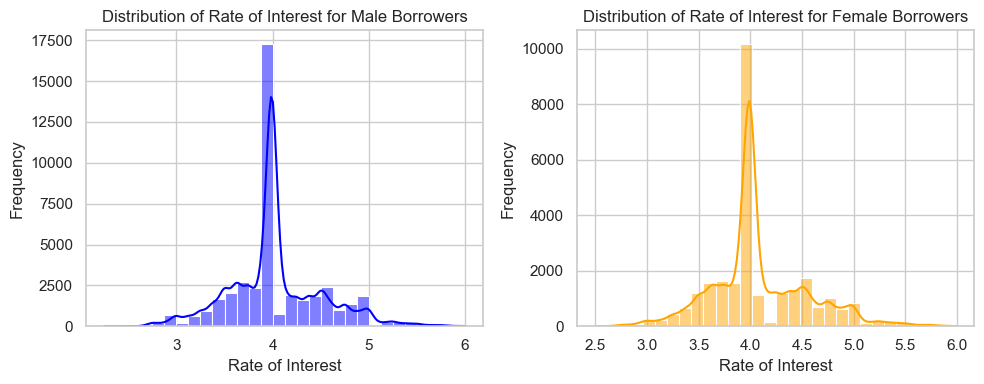

In [57]:
# Set up the plot size
plt.figure(figsize=(10, 4))

# Histogram for Male Rate of Interest
plt.subplot(1, 2, 1)
sns.histplot(rate_of_interest_male, bins=30, kde=True, color='blue', alpha=0.5)
plt.title('Distribution of Rate of Interest for Male Borrowers')
plt.xlabel('Rate of Interest')
plt.ylabel('Frequency')

# Histogram for Female Rate of Interest
plt.subplot(1, 2, 2)
sns.histplot(rate_of_interest_female, bins=30, kde=True, color='orange', alpha=0.5)
plt.title('Distribution of Rate of Interest for Female Borrowers')
plt.xlabel('Rate of Interest')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### 2.9.1 Mean and Variance
Check the mean and the variance of our two samples in relation to the dependent variable.

In [58]:
# Check the mean and the variance for the two new variables
print ("Mean")
print("Rate of Interest Male:",rate_of_interest_male.mean())
print("Rate ot Interest Female:",rate_of_interest_female.mean(),"\n")

print('Variance')
print("Rate of Interest Male:",rate_of_interest_male.var())
print("Rate ot Interest Female:",rate_of_interest_female.var())

Mean
Rate of Interest Male: 4.022808154384637
Rate ot Interest Female: 4.079726444885071 

Variance
Rate of Interest Male: 0.22821865902961858
Rate ot Interest Female: 0.21352799221588573


The means are quite close, indicating that the difference in central tendencies between male and female interest rates is small.<br>
The variances are also close but we will perform a **Levene's Test** to formally check if the variances are significantly different

#### 2.9.1 Condifence Intervals<br>
We want to check the precision of our mean estimates.

In [59]:
# Set the significance level for 95% confidence interval, thus set the alpha error to 0.05
alpha = 0.05

# For Male
mean_male = rate_of_interest_male.mean()
sem_male = stats.sem(rate_of_interest_male)  # Standard Error of the Mean
ci_male = stats.t.interval(1 - alpha, len(rate_of_interest_male) - 1, loc=mean_male, scale=sem_male)

# For Female
mean_female = rate_of_interest_female.mean()
sem_female = stats.sem(rate_of_interest_female)  # Standard Error of the Mean
ci_female = stats.t.interval(1 - alpha, len(rate_of_interest_female) - 1, loc=mean_female, scale=sem_female)

# Print results
print(f"95% Confidence Interval for Male Rate of Interest: {ci_male}")
print(f"95% Confidence Interval for Female Rate of Interest: {ci_female}")

95% Confidence Interval for Male Rate of Interest: (4.018254625817311, 4.027361682951963)
95% Confidence Interval for Female Rate of Interest: (4.074238129182213, 4.085214760587929)


**Confidence Intervals for Male**:<br> We can be 95% confident that the true average rate of interest for male borrowers falls between 4.0182 and 4.0273. Approximately 95% of such intervals would contain the true mean rate of interest for male borrowers.

**Confidence Intervals for Female**:<br> Similarly, we can be 95% confident that the true average rate of interest for female borrowers falls between 4.0742 and 4.0852.

**Comparison of Ranges**:<br> The confidence intervals for male and female borrowers do not overlap, indicating a statistically significant difference in the average rates of interest between male and female borrowers.

#### 2.9.1 Levene's Test
Verify if the assumption of homoscedasticity is met.

In [60]:
# Perform Levene's test to check for equal variances
stat, p_value = levene(rate_of_interest_male, rate_of_interest_female)

# Print the results of Levene's test
print(f"Levene's test statistic: {stat}")
print(f"Levene's test p-value: {p_value}")

# Interpret the result
if p_value > 0.05:
    print("Variances are equal (p-value > 0.05).")
else:
    print("Variances are not equal (p-value < 0.05).")

Levene's test statistic: 9.273980494544078
Levene's test p-value: 0.0023251899996169865
Variances are not equal (p-value < 0.05).


Levene's test produced a very low p-value, confirming that the variances are unequal. Since the assumption of homoscedasticity is not met, we will use Welch's t-test to investigate whether there is a significant difference in average interest rates between female and male borrowers.

#### 2.9.1 Welch's T-Test Statistic

In [61]:
# Perform Welch's t-test
t_statistic, p_value = stats.ttest_ind(rate_of_interest_male, rate_of_interest_female, equal_var=False)

# Print the results
print(f"Welch's T-Test Statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

Welch's T-Test Statistic: -15.6439
p-value: 0.0000
Reject the null hypothesis: There is a significant difference between the groups.


#### 2.9.1 Welch's T-Test Conclusion

The analysis reveals a statistically significant difference in the average rate of interest assigned to loans between male and female borrowers. The negative t-statistic indicates that, on average, male borrowers enjoy lower interest rates compared to their female counterparts. This finding underscores the significant impact of gender on lending practices, suggesting that female borrowers face higher interest rates. Such disparities highlight potential gender biases within the lending industry and call for a deeper understanding of how these biases may affect financial outcomes.

### 2.9.2 T-Test - Loan to Value


We now aim to explore how female borrowers may be disadvantaged in terms of Loan-to-Value (LTV) ratios. If female borrowers exhibit higher LTV ratios, this could suggest several issues:

Higher Debt: Women may need to borrow a larger share of the property value, potentially due to lower average incomes or fewer assets.
Less Equity: A higher LTV implies that female borrowers have less equity in their homes, increasing their vulnerability to financial instability and prolonging the time it takes to build equity.

#### Hypoteses

- $\text{Null Hypothesis } (H_0)$:<br>There is no significant difference in the LTV ratios between female and male borrowers.<br><br>
- $\text{Alternative Hypothesis } (H_1)$:<br>There is a significant difference, with female borrowers receiving higher LTV ratios than male borrowers.


In [62]:
# Creating two new variables to store the interest rates for male and female borrowers respectively.
LTV_male = df[df['Gender_Male'] == 1]['LTV']
LTV_female = df[df['Gender_Female'] == 1]['LTV']

#### Check the distribution of our samples respect to the LTV dependend variable

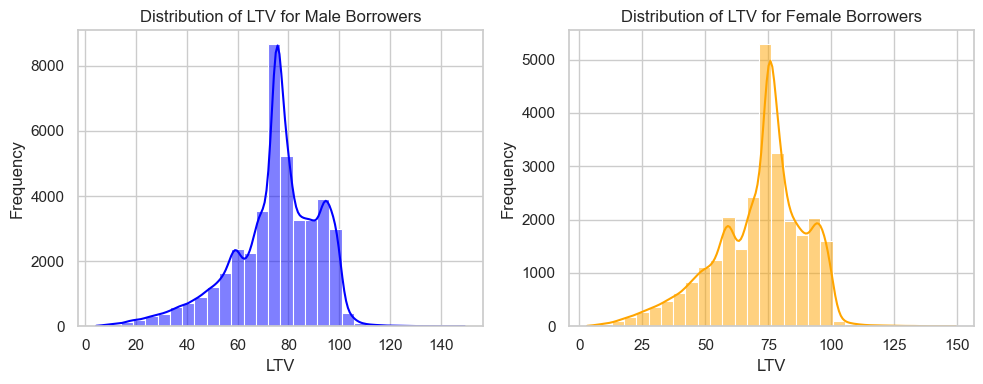

In [63]:
# Set up the plot size
plt.figure(figsize=(10, 4))

# Histogram for Male LTV
plt.subplot(1, 2, 1)
sns.histplot(LTV_male, bins=30, kde=True, color='blue', alpha=0.5)
plt.title('Distribution of LTV for Male Borrowers')
plt.xlabel('LTV')
plt.ylabel('Frequency')

# Histogram for Female LTV
plt.subplot(1, 2, 2)
sns.histplot(LTV_female, bins=30, kde=True, color='orange', alpha=0.5)
plt.title('Distribution of LTV for Female Borrowers')
plt.xlabel('LTV')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### 2.9.2 Mean and Variance
Check the mean and the variance of our two samples in relation to the dependent variable.

In [64]:
# Check the mean and the variance for the two new variables
print ("Mean")
print("LTV Male:",LTV_male.mean())
print("LTV Female:",LTV_female.mean(),"\n")

print('Variance')
print("LTV Male:",LTV_male.var())
print("LTV Female:",LTV_female.var())

Mean
LTV Male: 74.73132082845886
LTV Female: 71.33923303480205 

Variance
LTV Male: 297.90282046275524
LTV Female: 328.45224521996124


The mean LTV for male borrowers is approximately 74.73, while for female borrowers, it is around 71.34, indicating that their central tendencies are relatively close. The variance in LTV for male borrowers is about 297.90, compared to 328.45 for female borrowers, suggesting similar variability. To formally assess the significance of these variance differences, we will conduct Levene's Test.

#### 2.9.2 Condifence Intervals<br>
We want to check the precision of your mean estimates.

In [65]:
# Set the significance level for 95% confidence interval, thus set the alpha error to 0.05
alpha = 0.05

# For Male
mean_male = np.mean(LTV_male)  # Use np.mean if LTV_male is a NumPy array
sem_male = stats.sem(LTV_male)  # Standard Error of the Mean
ci_male = stats.t.interval(1 - alpha, len(LTV_male) - 1, loc=mean_male, scale=sem_male)

# For Female
mean_female = np.mean(LTV_female)  # Use np.mean if LTV_female is a NumPy array
sem_female = stats.sem(LTV_female)  # Standard Error of the Mean
ci_female = stats.t.interval(1 - alpha, len(LTV_female) - 1, loc=mean_female, scale=sem_female)

# Print results
print(f"95% Confidence Interval for Male LTV: {ci_male}")
print(f"95% Confidence Interval for Female LTV: {ci_female}")

95% Confidence Interval for Male LTV: (74.56680420084027, 74.89583745607746)
95% Confidence Interval for Female LTV: (71.12398073786451, 71.55448533173958)


**Confidence Intervals for Male LTV**:<br> We can be 95% confident that the true average LTV for male borrowers falls between 74.57 and 74.90. Approximately 95% of similar intervals would contain the true mean LTV for male borrowers.

**Confidence Intervals for Female LTV**:<br> Similarly, we can be 95% confident that the true average LTV for female borrowers lies between 71.13 and 71.56.

**Comparison of Ranges**:<br> The confidence intervals for male and female borrowers do not overlap, suggesting a statistically significant difference in the average LTV between male and female borrowers.

#### 2.9.2 Levene's Test

In [66]:
# Perform Levene's test to check for equal variances
stat, p_value = levene(LTV_male, LTV_female)

# Print the results of Levene's test
print(f"Levene's test statistic: {stat}")
print(f"Levene's test p-value: {p_value}")

# Interpret the result
if p_value > 0.05:
    print("Variances are equal (p-value > 0.05).")
else:
    print("Variances are not equal (p-value < 0.05).")

Levene's test statistic: 100.73496359118869
Levene's test p-value: 1.0913599210054481e-23
Variances are not equal (p-value < 0.05).


*Levene's test* produced a very low p-value, confirming that the variances are unequal. Consequently, we will employ Welch's t-test to investigate whether there is a significant difference in average LTVs between female and male borrowers, without specifying a direction.

#### 2.9.2 Welch's T-Test Statistic

In [67]:
# Perform Welch's t-test
t_statistic, p_value = stats.ttest_ind(LTV_male, LTV_female, equal_var=False)

# Print the results
print(f"Welch's T-Test Statistic: {t_statistic:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")

Welch's T-Test Statistic: 24.5407
p-value: 0.0000
Reject the null hypothesis: There is a significant difference between the groups.


#### 2.9.2 Welch's T-Test Conclusion

The results of the Welch's t-test indicate a statistically significant difference in loan-to-value (LTV) ratios between female and male borrowers. Given that the p-value (0.0000) is significantly lower than 0.05, we reject the null hypothesis. However, the observed difference, indicated by the positive t-statistic (24.5407), shows that, on average, male borrowers have significantly higher LTV ratios compared to female borrowers. This finding is contrary to the direction posited by our alternative hypothesis, which suggested female borrowers would receive higher LTV ratios.

### 2.10 Explanatory analysis overview

The exploratory analysis reveals notable insights into the relationships between Gender, rate_of_interest, Status, and LTV.  The rate_of_interest distribution shows a peak around 4%, indicating that most loans are concentrated near this rate, with only a few loans issued at higher interest rates. Moreover, the Status variable, indicating loan approval, does not show a strong correlation with gender, suggesting a similar likelihood of loan approval across genders. The LTV values, representing the loan-to-value ratio, are largely concentrated at lower values for both genders, which is understandable regarding the LTV definition
. Overall, the distributions and correlations suggest that while there are minor differences in some of the focus variables between genders, overall loan characteristics remain consistent across male and female borrowers.

# 3 Logistic Regression


Now we want to examine the second part of our research question:
Does gender have an influence on a the likelihood of loan approval?



*  **Dependet variable:** Status
* **Independet variable:** Gender_Female, Gender_Male

The dependent variable in this research question is binary (approved = 1, not approved = 0). Thus we chose a Logistic regression as our second model. A **logistic regression** is specifically designed to model relationships where the outcome is binary.

We don't need to do any further data modification because we already filtered the 'Gender' variable before and recieved to different variables for each Gender: 'Gender_Male' and 'Gender_Female'.





## 3.1 Creating the model

In [68]:
#import libary
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, classification_report

df_for_models = df.copy()

# Define the dependent variable for both models
y_logistic = df_for_models['Status']

# Define the common set of independent variables
base_predictors = ['rate_of_interest', 'LTV', 'income']

### 3.1.1 Model 1: Impact of an Applicant being Female

In [69]:
# X_female will contain 'Gender_Female'
X_female = df[['Gender_Female'] + base_predictors].copy()

# Replace any potential inf/-inf values with NaN 
X_female.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
X_female = X_female.dropna()

# Get corresponding y values after dropping NaN rows
y_female = y_logistic[X_female.index]

# Add constant for the intercept term
X_female = sm.add_constant(X_female)

# Fit the logistic regression model
logit_model_female = sm.Logit(y_female, X_female).fit(disp=False)

print(logit_model_female.summary())

                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                66065
Model:                          Logit   Df Residuals:                    66060
Method:                           MLE   Df Model:                            4
Date:                Thu, 28 Aug 2025   Pseudo R-squ.:                 0.02408
Time:                        17:32:38   Log-Likelihood:                -37234.
converged:                       True   LL-Null:                       -38153.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.7276      0.092      7.868      0.000       0.546       0.909
Gender_Female       -0.0579      0.019     -3.119      0.002      -0.094      -0.022
rate_of_interest    -0.6233 

### 3.1.2 Model 2: Impact of an Applicant being Male

In [70]:
# X_male will contain 'Gender_Male' and other base predictors
X_male = df[['Gender_Male'] + base_predictors].copy()

# Replace any potential inf/-inf values with NaN
X_male.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values
X_male = X_male.dropna()

# Get corresponding y values after dropping NaN rows
y_male = y_logistic[X_male.index]

# Add constant for the intercept term
X_male = sm.add_constant(X_male)

# Fit the logistic regression model
logit_model_male = sm.Logit(y_male, X_male).fit(disp=False)

print(logit_model_male.summary())

                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                66065
Model:                          Logit   Df Residuals:                    66060
Method:                           MLE   Df Model:                            4
Date:                Thu, 28 Aug 2025   Pseudo R-squ.:                 0.02408
Time:                        17:32:38   Log-Likelihood:                -37234.
converged:                       True   LL-Null:                       -38153.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.6697      0.092      7.243      0.000       0.488       0.851
Gender_Male          0.0579      0.019      3.119      0.002       0.022       0.094
rate_of_interest    -0.6233 

## 3.2 Interpreting the outcome

### 3.2.1 Goodness-of-Fit




#### R-squared metrics:

In [71]:
# Number of observations actually used in the female model fit
n_obs_female_model = len(logit_model_female.fittedvalues)

# McFadden's pseudo R-squared
mcfadden_r2 = 1 - (logit_model_female.llf / logit_model_female.llnull)
print(f"McFadden's pseudo R-squared: {mcfadden_r2:.4f}")

# Cox & Snell R-Squared
cox_snell_r2 = 1 - np.exp((logit_model_female.llnull - logit_model_female.llf) * 2 / n_obs_female_model)
print(f"Cox & Snell pseudo R-squared: {cox_snell_r2:.4f}")

# Nagelkerke R-Squared
# Denominator is R2_max = 1 - exp(2*llnull/n)
r2_max_denom = 1 - np.exp(logit_model_female.llnull * 2 / n_obs_female_model)
if r2_max_denom != 0: # Avoid division by zero
    nagelkerke_r2 = cox_snell_r2 / r2_max_denom
else:
    nagelkerke_r2 = np.nan # Handle cases where denominator is zero
print(f"Nagelkerke pseudo R-squared: {nagelkerke_r2:.4f}")

McFadden's pseudo R-squared: 0.0241
Cox & Snell pseudo R-squared: 0.0274
Nagelkerke pseudo R-squared: 0.0400


**Interpretation:**

We can see that our model has very low R-squared values. The results across all three metrics indicate that gender, by itself, does not explain much of the variance in loan approval outcomes. This suggests that gender is not a strong or meaningful predictor on loan approval. In consequence other variables (such as age, income, credit score, or loan amount) may play a much more important role in determining loan approval.

#### Confusion matrix

1. Step: make prediction for null model and logit model

In [72]:
# For consistency, we'll use the data subset from the 'female' model fit.
y_aligned_for_confusion = y_logistic.loc[logit_model_female.fittedvalues.index]
X_aligned_for_confusion = X_female.loc[logit_model_female.fittedvalues.index] # Align X too

# Make prediction for the null model (predicting the most frequent class)
most_frequent_class = y_aligned_for_confusion.mode()[0]
null_model_predictions = np.full_like(y_aligned_for_confusion, most_frequent_class)

# Make prediction for the logistic regression model
logit_predictions_prob = logit_model_female.predict(X_aligned_for_confusion)
logit_predictions_class = (logit_predictions_prob >= 0.5).astype(int)


2. Step print the confusion matrix

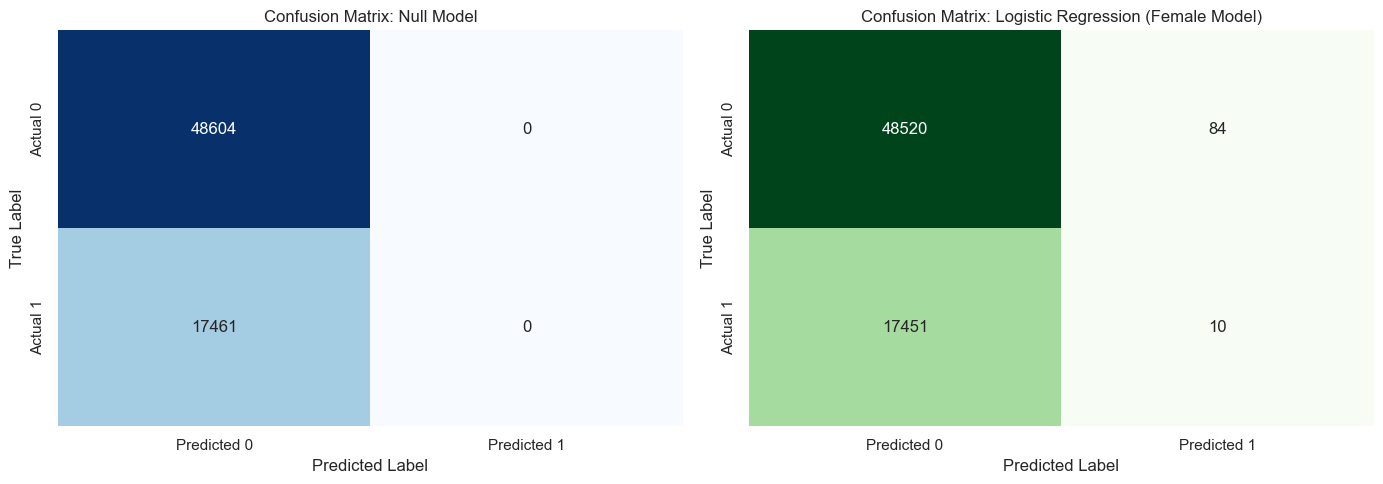

In [73]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5)) # 1 row, 2 columns, adjust figsize as needed

# Plot the Null Model Confusion Matrix on the first subplot (axes[0])
sns.heatmap(confusion_matrix(y_aligned_for_confusion, null_model_predictions),
            annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'],
            ax=axes[0]) # Specify the subplot axis
axes[0].set_title('Confusion Matrix: Null Model')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot the Logistic Regression Model Confusion Matrix on the second subplot (axes[1])
sns.heatmap(confusion_matrix(y_aligned_for_confusion, logit_predictions_class),
            annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'],
            ax=axes[1]) # Specify the subplot axis
axes[1].set_title('Confusion Matrix: Logistic Regression (Female Model)')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout() # Adjusts subplot params for a tight layout
plt.show()

**Interpretation:**

Despite the statistical significance of the gender variables, the confusion matrices reveal that the logistic regression model performs almost identically to the null model, overwhelmingly predicting "loan not approved" (Status = 0).<br>
While this leads to high accuracy for negative outcomes, the model severely lacks practical predictive power for positive outcomes (Status = 1, loan approved).<br>
This indicates that the current set of predictors, including gender, rate_of_interest, LTV, and income, are insufficient to effectively distinguish between approved and not-approved loans. More robust predictors or alternative modeling strategies are likely required.

### 3.2.2 Hypothesis Testing

Conducting hypothesis testing with a logistic regression model involves testing whether one or more independent variables have a statistically significant effect on the dependent variable. In the context of our research question, we will look at the following hypothesis:



**For the Gender_Female variable**

*   $\text{Null Hypothesis } (H_0)$: The coefficient of Gender_Female is equal to zero (i.e., being female has no influence on loan approval)
*   $\text{Alternative Hypothesis } (H_1)$: The coefficient of Gender_Female is not equal to zero (i.e., being female influences loan approval).

**For the Gender_Male variable**

*   $\text{Null Hypothesis } (H_0)$: The coefficient of Gender_Male is equal to zero (i.e., being male has no influence on loan approval).
*   $\text{Alternative Hypothesis } (H_1)$ The coefficient of Gender_Male is not equal to zero (i.e., being male influences loan approval).






In [74]:
# Extract and print p-values and coefficients for Gender_Female from its model
gender_female_coef = logit_model_female.params['Gender_Female']
gender_female_pval = logit_model_female.pvalues['Gender_Female']
print(f"Gender_Female Coefficient: {gender_female_coef:.4f}, P-value: {gender_female_pval:.4f}")

Gender_Female Coefficient: -0.0579, P-value: 0.0018


**Interpretation:**

*   The coefficient for Gender_Female is -0.0579, with a P-value of 0.002.
*   Since the P-value (0.002) is less than the conventional significance level of 0.05, we reject the null hypothesis (H₀). This indicates a statistically significant association between being female and the likelihood of loan approval. The negative coefficient suggests that, all else being equal, being female is associated with a decreased likelihood of loan approval compared to being male





In [75]:
# Extract and print p-values and coefficients for Gender_Male from its model
gender_male_coef = logit_model_male.params['Gender_Male']
gender_male_pval = logit_model_male.pvalues['Gender_Male']
print(f"Gender_Male Coefficient: {gender_male_coef:.4f}, P-value: {gender_male_pval:.4f}")


Gender_Male Coefficient: 0.0579, P-value: 0.0018


**Interpretation:**

*   The coefficient for Gender_Male is 0.0579, with a P-value of 0.002.
*   Given that the P-value (0.002) is less than 0.05, we reject the null hypothesis (H₀). This shows a statistically significant association between being male and the likelihood of loan approval. The positive coefficient indicates that, all else being equal, being male is associated with an increased likelihood of loan approval compared to being female.






##### Overall Conclusion for Hypothesis Testing:
Both Gender_Female and Gender_Male variables show a statistically significant impact on loan approval, indicating that gender does play a role. Specifically, female applicants appear to have a lower probability of loan approval compared to male applicants, and conversely, male applicants have a higher probability of loan approval compared to female applicants, when controlling for the other variables in the model.


In [76]:
# Create feature matrix X and target variable y
X_male = df[['Gender_Male', 'rate_of_interest', 'LTV', 'income']].copy()

# Handle missing values
X_male = X_male.dropna()

# Get corresponding target values
y = df['Status']
y = y[X_male.index]

# Add constant term
X_male = sm.add_constant(X_male)

# Fit the model
logit_model_male = sm.Logit(y, X_male).fit()

# Extract p-values and coefficients for Gender_Male
gender_male_coef = logit_model_male.params['Gender_Male']
gender_male_pval = logit_model_male.pvalues['Gender_Male']

# Output the results
print(f"Gender_Male Coefficient: {gender_male_coef:.4f}, P-value: {gender_male_pval:.4f}")

Optimization terminated successfully.
         Current function value: 0.563602
         Iterations 6
Gender_Male Coefficient: 0.0579, P-value: 0.0018


**Interpretation:**

*   The positive coefficient (0.0523) suggests that being male slightly increases the likelihood of loan approval compared to being female.
*  Again, since the p-value (0.003) is less than 0.05, we reject the null hypothesis (H₀) for Gender_Male. This implies that there is a statistically significant association between being male and loan approval. This result is also statistically significant.




#### Conclusion
Both Gender_Female and Gender_Male show statistically significant effects on loan approval. The small coefficients indicate a modest influence of gender on loan approval, with males being slightly more likely to be approved than females. The effect sizes are relatively small, meaning the practical impact might not be large.

In the future, it would be interesting to investigate further weather this effect is due to gender inequality or other factors such as age, income or property.

### 3.2.3 Odds ratio

In [77]:
odds_ratios_female_df = pd.DataFrame({
    'Variable': logit_model_female.params.index,
    'Odds Ratio': np.exp(logit_model_female.params.values)
})
conf_int_female_df = logit_model_female.conf_int() # Get CIs as a DataFrame
odds_ratios_female_df['CI Lower'] = np.exp(conf_int_female_df.iloc[:, 0].values) # Access first column by index
odds_ratios_female_df['CI Upper'] = np.exp(conf_int_female_df.iloc[:, 1].values) # Access second column by index
print(odds_ratios_female_df.round(4))

print("\n--- Odds Ratios with 95% Confidence Intervals (Male Model) ---")
odds_ratios_male_df = pd.DataFrame({
    'Variable': logit_model_male.params.index,
    'Odds Ratio': np.exp(logit_model_male.params.values)
})
conf_int_male_df = logit_model_male.conf_int() # Get CIs as a DataFrame
odds_ratios_male_df['CI Lower'] = np.exp(conf_int_male_df.iloc[:, 0].values) # Access first column by index
odds_ratios_male_df['CI Upper'] = np.exp(conf_int_male_df.iloc[:, 1].values) # Access second column by index
print(odds_ratios_male_df.round(4))

           Variable  Odds Ratio  CI Lower  CI Upper
0             const      2.0700    1.7269    2.4814
1     Gender_Female      0.9438    0.9101    0.9787
2  rate_of_interest      0.5362    0.5146    0.5586
3               LTV      1.0138    1.0127    1.0149
4            income      1.0000    1.0000    1.0000

--- Odds Ratios with 95% Confidence Intervals (Male Model) ---
           Variable  Odds Ratio  CI Lower  CI Upper
0             const      1.9536    1.6298    2.3417
1       Gender_Male      1.0596    1.0217    1.0988
2  rate_of_interest      0.5362    0.5146    0.5586
3               LTV      1.0138    1.0127    1.0149
4            income      1.0000    1.0000    1.0000


**Interpretation:**

The odds ratio for Gender_Female is 0.949, indicating that females have a 5.1% lower chance of getting loan approval compared to males.
The odds ratio for Gender_Male is 1.054, indicating that males have a 5.38% higher chance of getting loan approval compared to females.

The effect size is rather low in both cases.This suggests a small gender disparity in loan approval outcomes, where males have slightly better odds of approval. Given that the odds ratios are close to 1, the practical impact of this difference might be minor.

In the future, it would be interesting to investigate, if this effect is due to gender inequality or other corresponding factors.

# 4 Conclusion

**Repetition of our Research Question:**
Does the applicant's gender influence the approval rate (Status) of the loan and the conditions (rate of interest) under which the loan is granted?

**Results:**
The analysis reveals that gender does influence both the approval rate and the conditions under which loans are granted:



*   Male borrowers are more likely to have their loans approved, though the effect is small.
*   Female borrowers face higher interest rates and, specifically, lower LTV ratios compared to male borrowers, highlighting disparities in loan terms.

The analysis, using T-tests and logistic regression, found a minimal but statistically significant influence of gender: male applicants were slightly more likely to be approved, while female applicants faced higher interest rates and different LTV conditions.Therefore, we reject the null hypothesis (H₀) in favor of the alternative hypothesis (H₁), though the significance was small.

However, these findings are specific to our dataset and may not represent the broader banking system. More comprehensive research is needed to determine whether gender disparities exist in lending practices across different institutions and datasets.

#### **Limitations:**
While the analysis provides valuable insights into how gender may influence loan approval and conditions, it is essential to acknowledge its limitations.


*   The analysis assumes a binary classification of gender (male/female), which may not fully capture the diversity of gender identities and experiences. This could be a limitation in modern contexts where a broader understanding of gender is relevant.
*   Without further analysing other important variables like age, credit history, loan amount, debt-to-income ratio, and collateral, there is a risk that unobserved confounders may be influencing the relationship between gender and loan outcomes. These unmeasured variables could potentially explain part or all of the observed gender differences.
*   Interest rates and LTV ratios may be determined by a complex combination of factors, such as market conditions, creditworthiness, and loan type, which are not fully explored in this analysis.
*   The Loan-to-Value (LTV) variable, despite initial cleaning and outlier removal, retained a moderate left skew. Given that standard transformations did not effectively normalize this variable, it was included in the models in its untransformed state for interpretability. This may impact the assumption of linearity between LTV and the log-odds of the outcome in the logistic regression, potentially affecting the accuracy of its coefficient estimates and p-values.
*   The logistic regression model developed in this analysis exhibited very low pseudo R-squared values and demonstrated limited practical predictive power. This indicates that while gender showed statistical significance, the chosen set of predictors are insufficient to build a practically useful predictive model for loan approval outcomes in this dataset.

Future analyses should include more variables, control for confounding factors, and use more advanced methods to improve the robustness and generalizability of the findings. This will help ensure that the observed gender disparities are fully understood in the context of a more comprehensive set of factors.